# Listings analysis over time. 

#### Retrieve listings from collection.

In [24]:
# Initialisation (ne lancer ce code QUE la première fois sinon ça efface toutes les données déjà enregistrées)

import pandas as pd
import cloudscraper
import regex as re
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import time

from bs4 import BeautifulSoup

figure(figsize=(14,8), dpi=80)

def extract_text_from_html(r):
    soup = BeautifulSoup(r, features="html.parser")
    
    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    
    return text

d = {'date': [], 'listings': []}
df = pd.DataFrame(d)

def récupérer_le_nombre_de_listings(url_de_la_collection):

    scraper = cloudscraper.create_scraper()
    r = scraper.get(url_de_la_collection).text

    scraped_text = extract_text_from_html(r)
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print("test", scraped_text[:17])
    print("test2", scraped_text[:17] == 'Access was denied')
    while scraped_text[:17] == 'Access was denied':
        print("hello_world")
        scraper = cloudscraper.create_scraper()
        r = scraper.get(url).text

        scraped_text = extract_text_from_html(r)

        now = datetime.now()
        current_time = now.strftime("%H:%M:%S")

    title_search = re.search('viewgrid_viewapps\d+', scraped_text, re.IGNORECASE)

    if title_search:
        title = title_search.group(0)
        listing_amount = title[17:]
        listing_amount = int(listing_amount)
    else:
        print("No match")
    new_row = {'date':now, 'listings':listing_amount}

    return new_row

<Figure size 1120x640 with 0 Axes>

In [25]:
url = 'https://opensea.io/collection/everai-heroes-duo?search[sortAscending]=true&search[sortBy]=PRICE&search[toggles][0]=BUY_NOW'

Loop n°:  0
test Access was denied
test2 True
hello_world
hello_world
                        date  listings
0 2022-04-01 18:09:49.298445     363.0
1 2022-04-01 18:09:54.772768     363.0
2 2022-04-01 18:10:00.132164     363.0
3 2022-04-01 18:10:05.676678     363.0
4 2022-04-01 18:10:18.259884     363.0


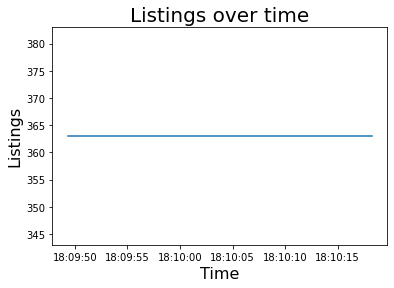

Loop n°:  1
test Access was denied
test2 True
hello_world
                        date  listings
0 2022-04-01 18:09:49.298445     363.0
1 2022-04-01 18:09:54.772768     363.0
2 2022-04-01 18:10:00.132164     363.0
3 2022-04-01 18:10:05.676678     363.0
4 2022-04-01 18:10:18.259884     363.0
5 2022-04-01 18:10:41.744152     361.0


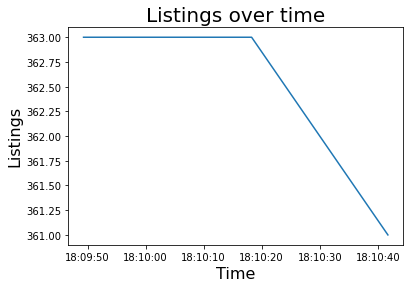

Loop n°:  2
test Everai Heroes: Du
test2 False
                        date  listings
0 2022-04-01 18:09:49.298445     363.0
1 2022-04-01 18:09:54.772768     363.0
2 2022-04-01 18:10:00.132164     363.0
3 2022-04-01 18:10:05.676678     363.0
4 2022-04-01 18:10:18.259884     363.0
5 2022-04-01 18:10:41.744152     361.0
6 2022-04-01 18:11:02.145194     361.0


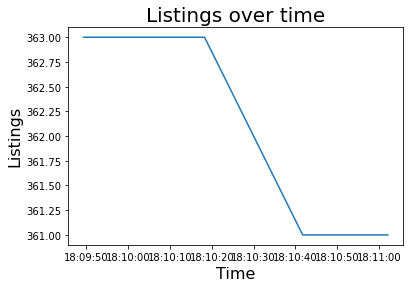

Loop n°:  3
test Access was denied
test2 True
hello_world
                        date  listings
0 2022-04-01 18:09:49.298445     363.0
1 2022-04-01 18:09:54.772768     363.0
2 2022-04-01 18:10:00.132164     363.0
3 2022-04-01 18:10:05.676678     363.0
4 2022-04-01 18:10:18.259884     363.0
5 2022-04-01 18:10:41.744152     361.0
6 2022-04-01 18:11:02.145194     361.0
7 2022-04-01 18:11:24.737239     369.0


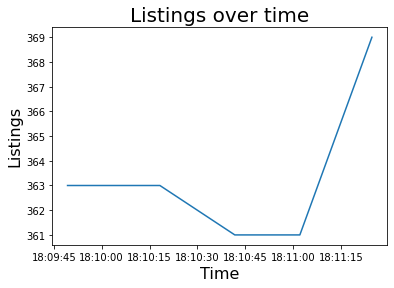

Loop n°:  4
test Everai Heroes: Du
test2 False
                        date  listings
0 2022-04-01 18:09:49.298445     363.0
1 2022-04-01 18:09:54.772768     363.0
2 2022-04-01 18:10:00.132164     363.0
3 2022-04-01 18:10:05.676678     363.0
4 2022-04-01 18:10:18.259884     363.0
5 2022-04-01 18:10:41.744152     361.0
6 2022-04-01 18:11:02.145194     361.0
7 2022-04-01 18:11:24.737239     369.0
8 2022-04-01 18:11:45.115166     369.0


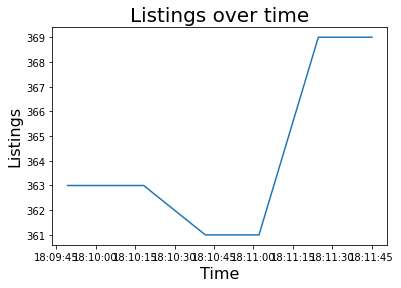

Loop n°:  5
test Everai Heroes: Du
test2 False
                        date  listings
0 2022-04-01 18:09:49.298445     363.0
1 2022-04-01 18:09:54.772768     363.0
2 2022-04-01 18:10:00.132164     363.0
3 2022-04-01 18:10:05.676678     363.0
4 2022-04-01 18:10:18.259884     363.0
5 2022-04-01 18:10:41.744152     361.0
6 2022-04-01 18:11:02.145194     361.0
7 2022-04-01 18:11:24.737239     369.0
8 2022-04-01 18:11:45.115166     369.0
9 2022-04-01 18:12:07.678021     369.0


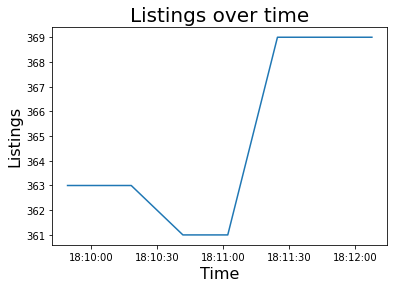

Loop n°:  6
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0


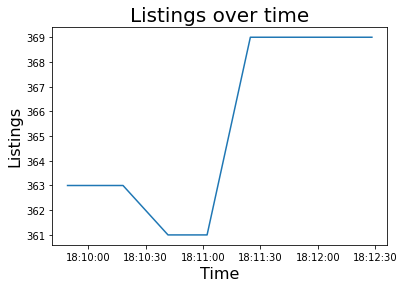

Loop n°:  7
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0


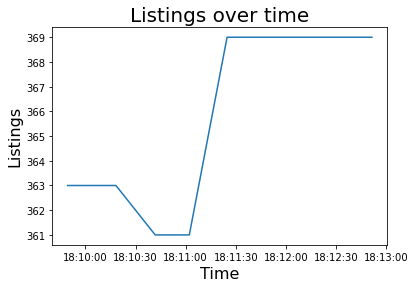

Loop n°:  8
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0


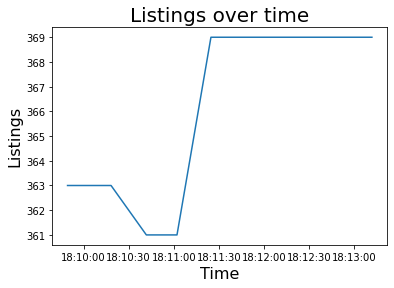

Loop n°:  9
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0


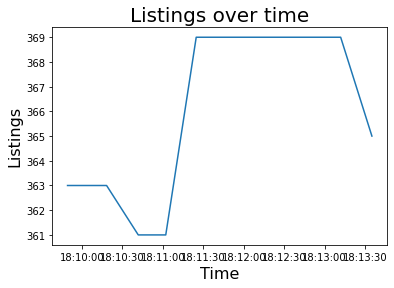

Loop n°:  10
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0


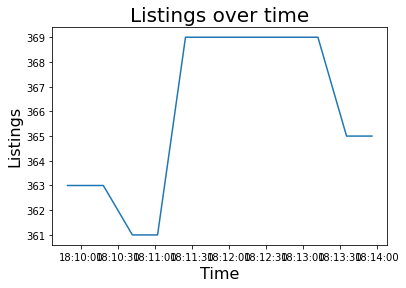

Loop n°:  11
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0


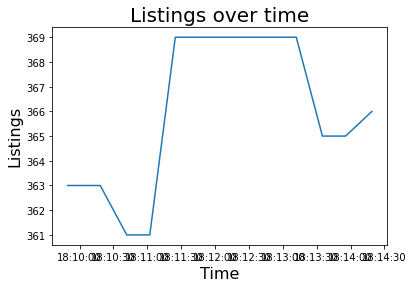

Loop n°:  12
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0


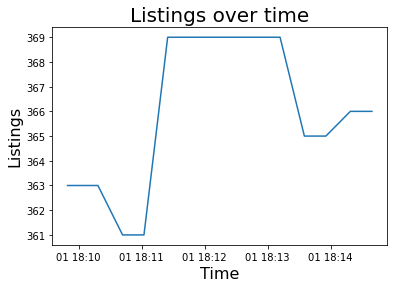

Loop n°:  13
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0


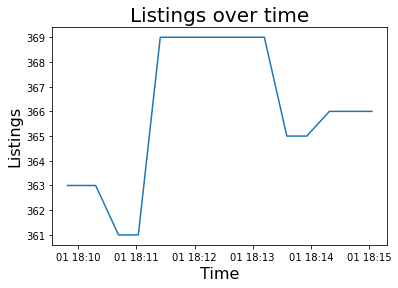

Loop n°:  14
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0


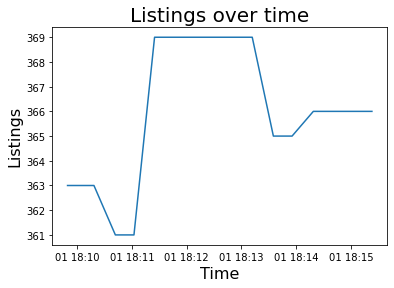

Loop n°:  15
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0


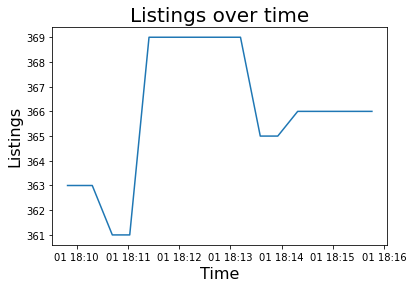

Loop n°:  16
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0


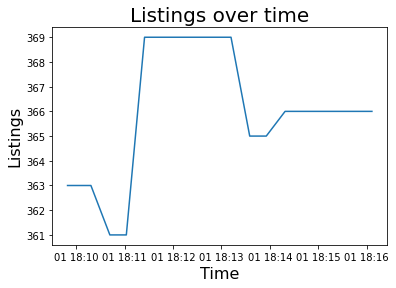

Loop n°:  17
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0


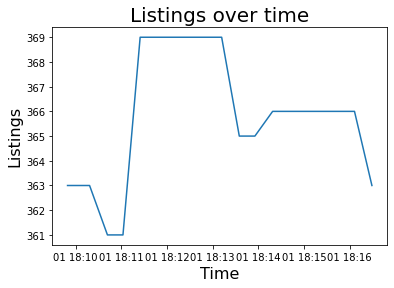

Loop n°:  18
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:4

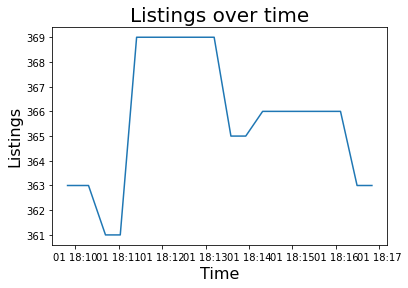

Loop n°:  19
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.35

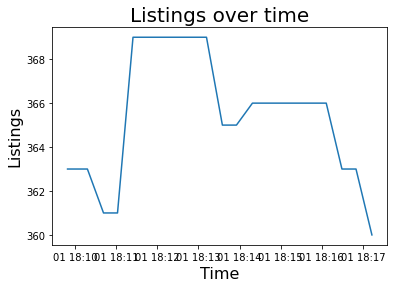

Loop n°:  20
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

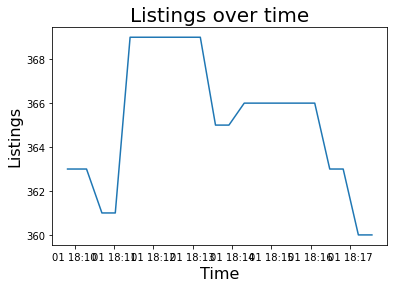

Loop n°:  21
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01

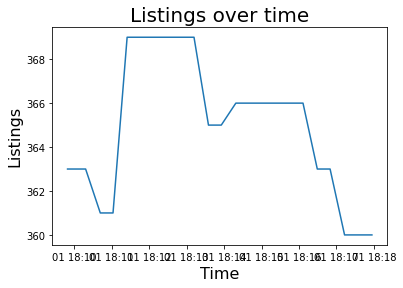

Loop n°:  22
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-0

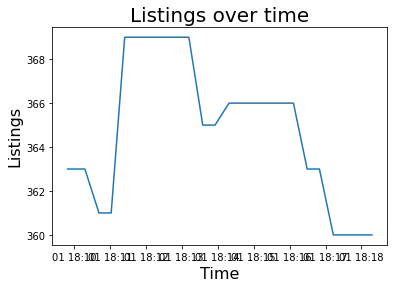

Loop n°:  23
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.35

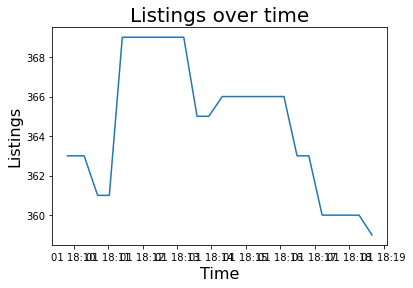

Loop n°:  24
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

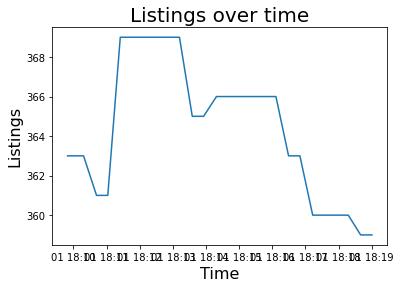

Loop n°:  25
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:4

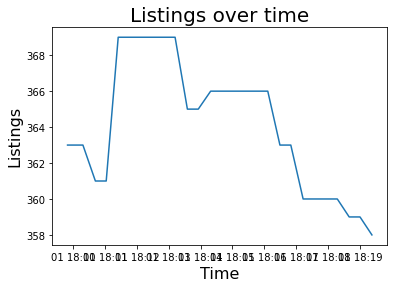

Loop n°:  26
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

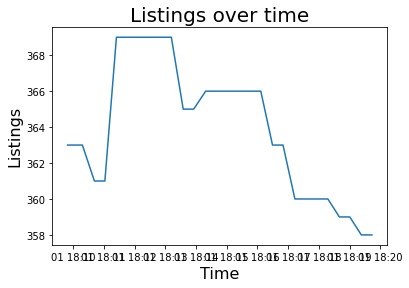

Loop n°:  27
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-0

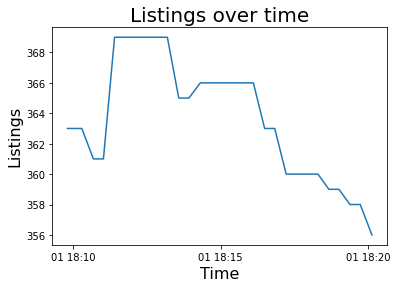

Loop n°:  28
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

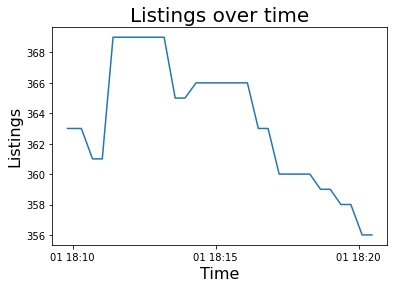

Loop n°:  29
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

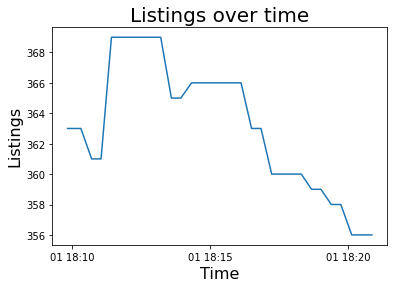

Loop n°:  30
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

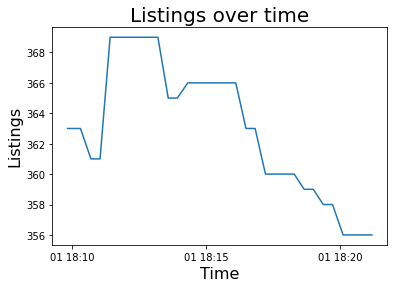

Loop n°:  31
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

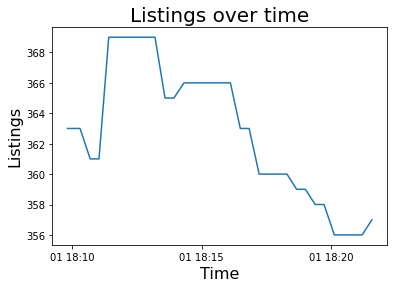

Loop n°:  32
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-0

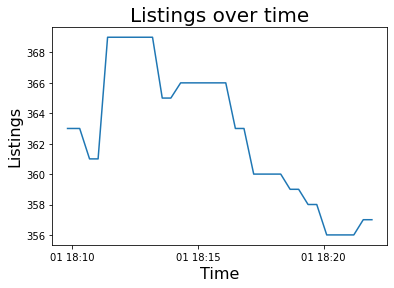

Loop n°:  33
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

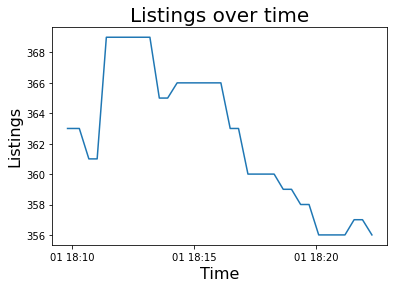

Loop n°:  34
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01

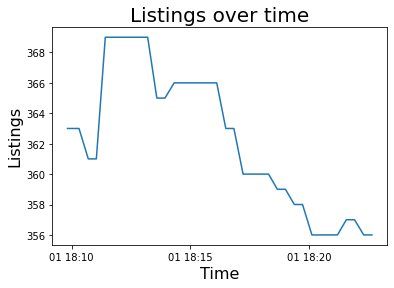

Loop n°:  35
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:4

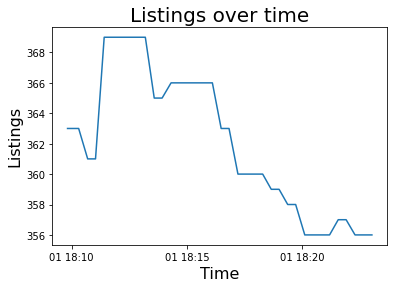

Loop n°:  36
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

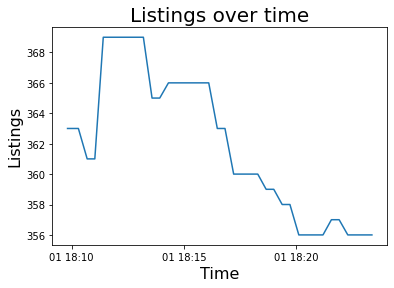

Loop n°:  37
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

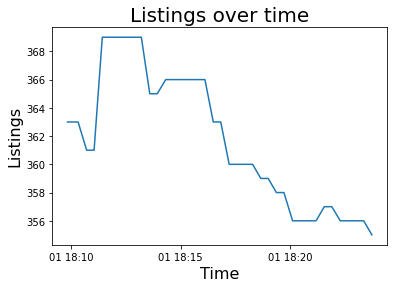

Loop n°:  38
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.35

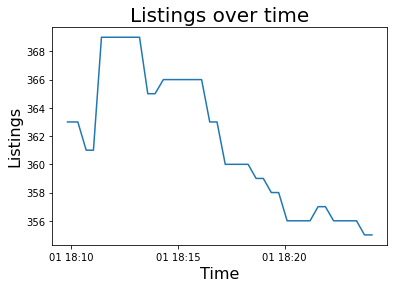

Loop n°:  39
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01

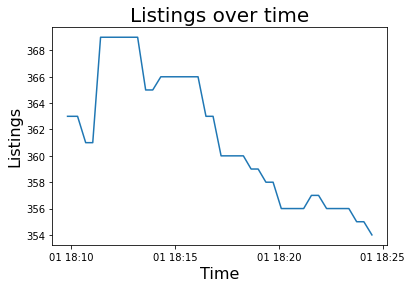

Loop n°:  40
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-0

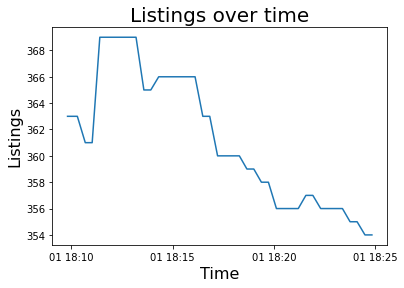

Loop n°:  41
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.35

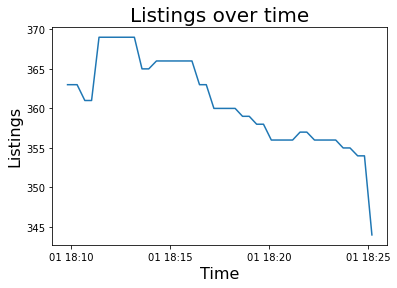

Loop n°:  42
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

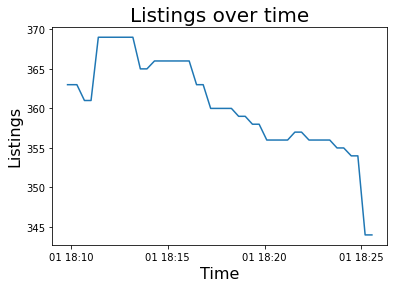

Loop n°:  43
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-0

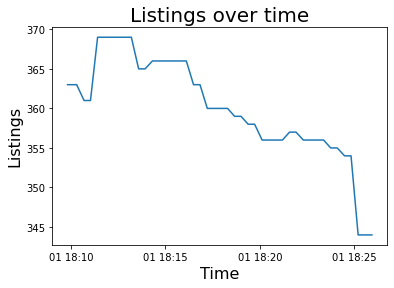

Loop n°:  44
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

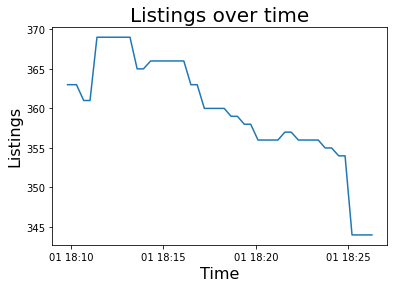

Loop n°:  45
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-0

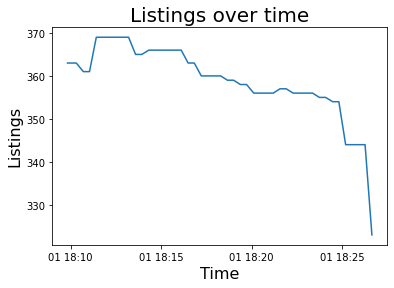

Loop n°:  46
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-0

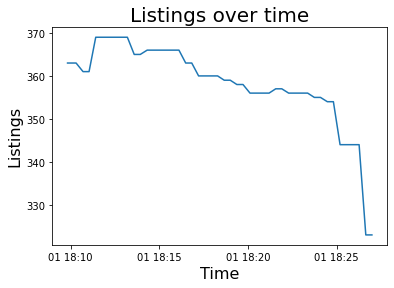

Loop n°:  47
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:4

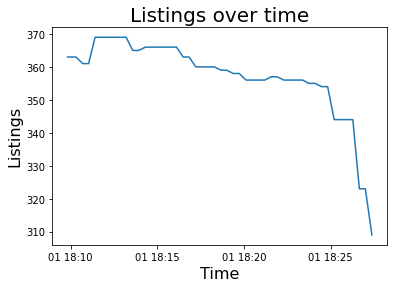

Loop n°:  48
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

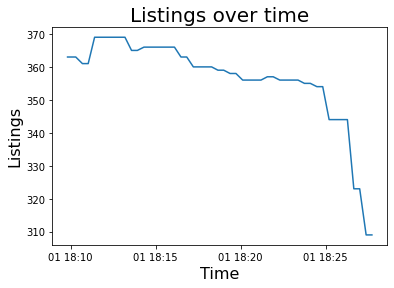

Loop n°:  49
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

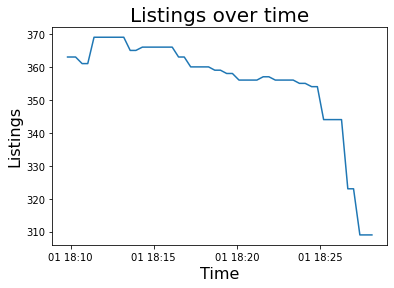

Loop n°:  50
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

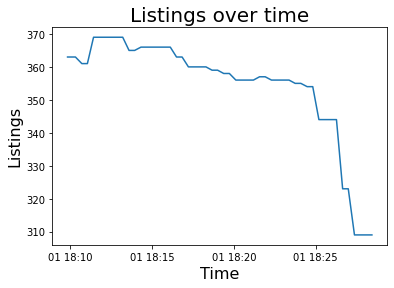

Loop n°:  51
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

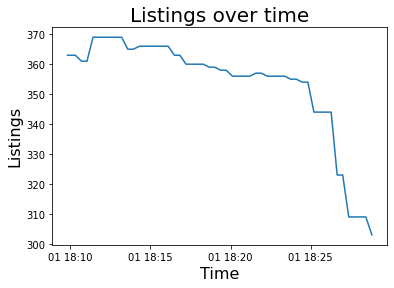

Loop n°:  52
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:4

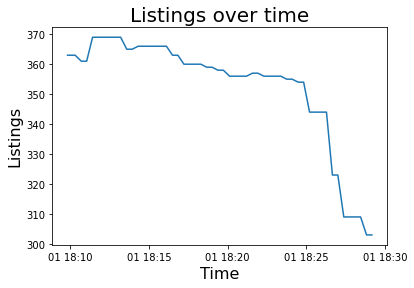

Loop n°:  53
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363

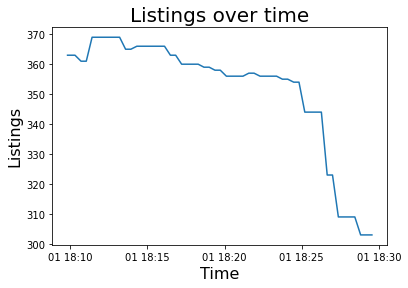

Loop n°:  54
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

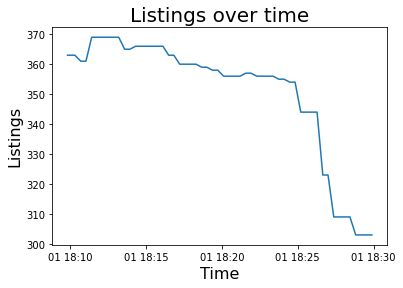

Loop n°:  55
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
5  2022-04-01 18:10:41.744152     361.0
6  2022-04-01 18:11:02.145194     361.0
7  2022-04-01 18:11:24.737239     369.0
8  2022-04-01 18:11:45.115166     369.0
9  2022-04-01 18:12:07.678021     369.0
10 2022-04-01 18:12:28.192163     369.0
11 2022-04-01 18:12:51.396118     369.0
12 2022-04-01 18:13:11.875262     369.0
13 2022-04-01 18:13:35.045555     365.0
14 2022-04-01 18:13:55.557049     365.0
15 2022-04-01 18:14:18.871709     366.0
16 2022-04-01 18:14:39.420424     366.0
17 2022-04-01 18:15:02.607107     366.0
18 2022-04-01 18:15:23.112943     366.0
19 2022-04-01 18:15:45.810690     366.0
20 2022-04-01 18:16:06.468820     366.0
21 2022-04-01 18:16:29.355888     363.0
22 2022-04-01 18:16:49.856306   

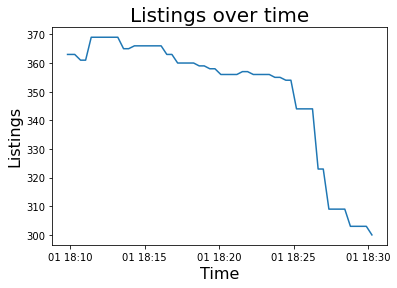

Loop n°:  56
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
56 2022-04-01 18:29:09.730304     303.0
57 2022-04-01 18:29:33.042327     303.0
58 2022-04-01 18:29:53.434365     303.0
59 2022-04-01 18:30:15.869400     300.0
60 2022-04-01 18:30:36.480161     300.0

[61 rows x 2 columns]


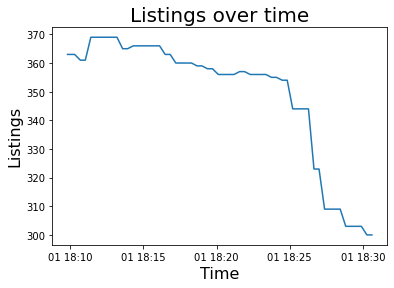

Loop n°:  57
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
57 2022-04-01 18:29:33.042327     303.0
58 2022-04-01 18:29:53.434365     303.0
59 2022-04-01 18:30:15.869400     300.0
60 2022-04-01 18:30:36.480161     300.0
61 2022-04-01 18:31:01.177967     300.0

[62 rows x 2 columns]


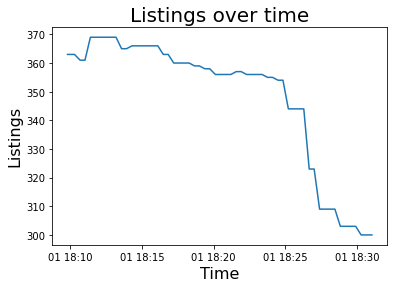

Loop n°:  58
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
58 2022-04-01 18:29:53.434365     303.0
59 2022-04-01 18:30:15.869400     300.0
60 2022-04-01 18:30:36.480161     300.0
61 2022-04-01 18:31:01.177967     300.0
62 2022-04-01 18:31:21.861707     300.0

[63 rows x 2 columns]


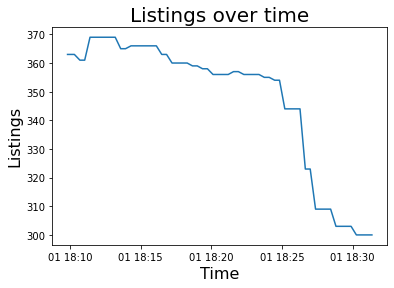

Loop n°:  59
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
59 2022-04-01 18:30:15.869400     300.0
60 2022-04-01 18:30:36.480161     300.0
61 2022-04-01 18:31:01.177967     300.0
62 2022-04-01 18:31:21.861707     300.0
63 2022-04-01 18:31:44.407798     297.0

[64 rows x 2 columns]


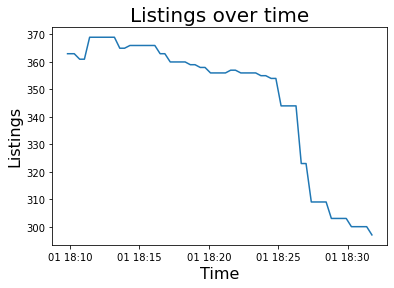

Loop n°:  60
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
60 2022-04-01 18:30:36.480161     300.0
61 2022-04-01 18:31:01.177967     300.0
62 2022-04-01 18:31:21.861707     300.0
63 2022-04-01 18:31:44.407798     297.0
64 2022-04-01 18:32:06.079453     297.0

[65 rows x 2 columns]


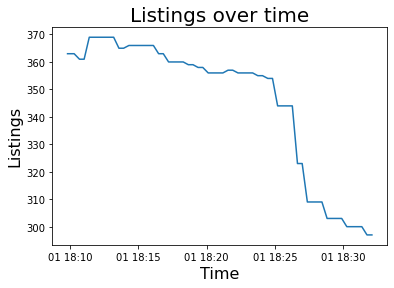

Loop n°:  61
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
61 2022-04-01 18:31:01.177967     300.0
62 2022-04-01 18:31:21.861707     300.0
63 2022-04-01 18:31:44.407798     297.0
64 2022-04-01 18:32:06.079453     297.0
65 2022-04-01 18:32:29.206871     295.0

[66 rows x 2 columns]


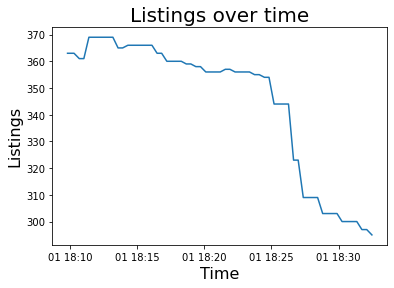

Loop n°:  62
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
62 2022-04-01 18:31:21.861707     300.0
63 2022-04-01 18:31:44.407798     297.0
64 2022-04-01 18:32:06.079453     297.0
65 2022-04-01 18:32:29.206871     295.0
66 2022-04-01 18:32:49.771124     295.0

[67 rows x 2 columns]


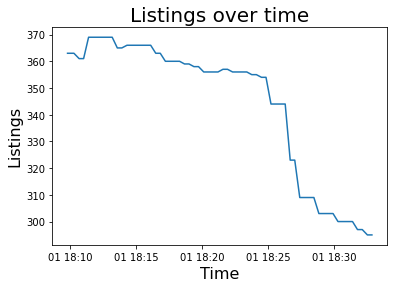

Loop n°:  63
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
63 2022-04-01 18:31:44.407798     297.0
64 2022-04-01 18:32:06.079453     297.0
65 2022-04-01 18:32:29.206871     295.0
66 2022-04-01 18:32:49.771124     295.0
67 2022-04-01 18:33:12.594546     303.0

[68 rows x 2 columns]


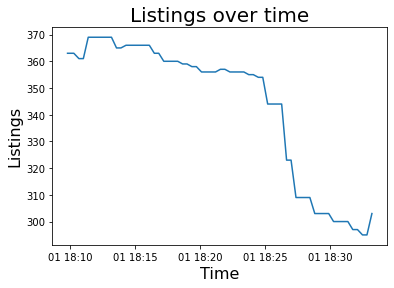

Loop n°:  64
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
64 2022-04-01 18:32:06.079453     297.0
65 2022-04-01 18:32:29.206871     295.0
66 2022-04-01 18:32:49.771124     295.0
67 2022-04-01 18:33:12.594546     303.0
68 2022-04-01 18:33:32.999788     303.0

[69 rows x 2 columns]


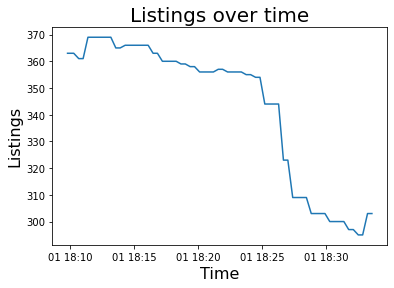

Loop n°:  65
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
65 2022-04-01 18:32:29.206871     295.0
66 2022-04-01 18:32:49.771124     295.0
67 2022-04-01 18:33:12.594546     303.0
68 2022-04-01 18:33:32.999788     303.0
69 2022-04-01 18:33:56.256425     303.0

[70 rows x 2 columns]


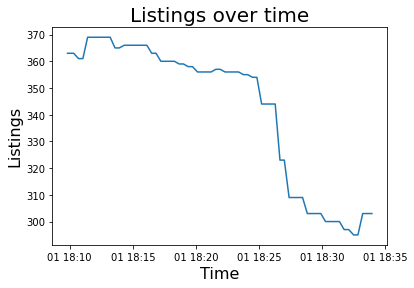

Loop n°:  66
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
66 2022-04-01 18:32:49.771124     295.0
67 2022-04-01 18:33:12.594546     303.0
68 2022-04-01 18:33:32.999788     303.0
69 2022-04-01 18:33:56.256425     303.0
70 2022-04-01 18:34:16.633653     303.0

[71 rows x 2 columns]


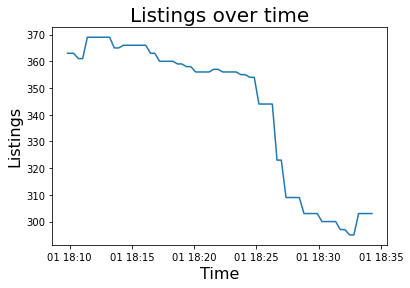

Loop n°:  67
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
67 2022-04-01 18:33:12.594546     303.0
68 2022-04-01 18:33:32.999788     303.0
69 2022-04-01 18:33:56.256425     303.0
70 2022-04-01 18:34:16.633653     303.0
71 2022-04-01 18:34:39.672561     306.0

[72 rows x 2 columns]


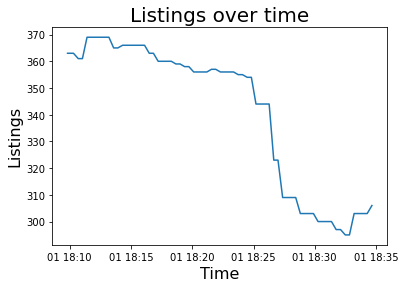

Loop n°:  68
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
68 2022-04-01 18:33:32.999788     303.0
69 2022-04-01 18:33:56.256425     303.0
70 2022-04-01 18:34:16.633653     303.0
71 2022-04-01 18:34:39.672561     306.0
72 2022-04-01 18:35:00.046660     306.0

[73 rows x 2 columns]


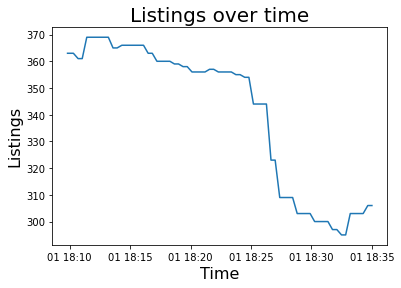

Loop n°:  69
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
69 2022-04-01 18:33:56.256425     303.0
70 2022-04-01 18:34:16.633653     303.0
71 2022-04-01 18:34:39.672561     306.0
72 2022-04-01 18:35:00.046660     306.0
73 2022-04-01 18:35:23.662596     308.0

[74 rows x 2 columns]


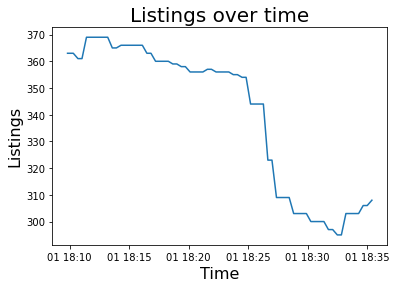

Loop n°:  70
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
70 2022-04-01 18:34:16.633653     303.0
71 2022-04-01 18:34:39.672561     306.0
72 2022-04-01 18:35:00.046660     306.0
73 2022-04-01 18:35:23.662596     308.0
74 2022-04-01 18:35:44.455721     308.0

[75 rows x 2 columns]


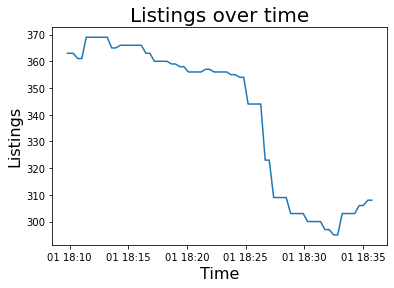

Loop n°:  71
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
71 2022-04-01 18:34:39.672561     306.0
72 2022-04-01 18:35:00.046660     306.0
73 2022-04-01 18:35:23.662596     308.0
74 2022-04-01 18:35:44.455721     308.0
75 2022-04-01 18:36:07.601901     308.0

[76 rows x 2 columns]


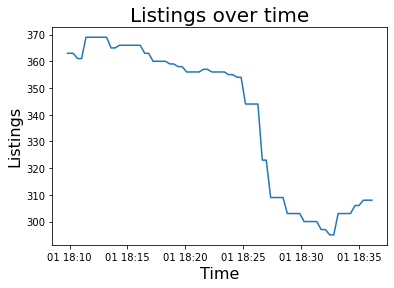

Loop n°:  72
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
72 2022-04-01 18:35:00.046660     306.0
73 2022-04-01 18:35:23.662596     308.0
74 2022-04-01 18:35:44.455721     308.0
75 2022-04-01 18:36:07.601901     308.0
76 2022-04-01 18:36:28.115562     308.0

[77 rows x 2 columns]


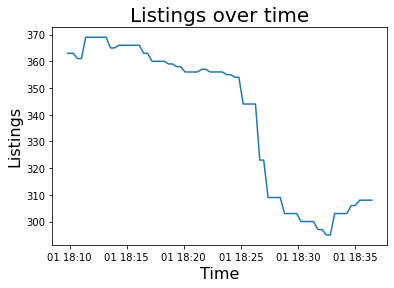

Loop n°:  73
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
73 2022-04-01 18:35:23.662596     308.0
74 2022-04-01 18:35:44.455721     308.0
75 2022-04-01 18:36:07.601901     308.0
76 2022-04-01 18:36:28.115562     308.0
77 2022-04-01 18:36:52.018056     308.0

[78 rows x 2 columns]


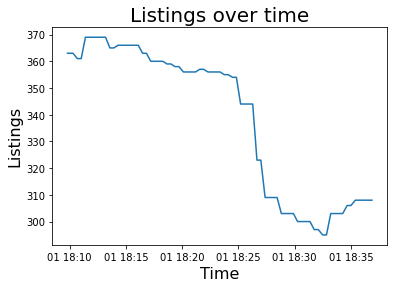

Loop n°:  74
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
74 2022-04-01 18:35:44.455721     308.0
75 2022-04-01 18:36:07.601901     308.0
76 2022-04-01 18:36:28.115562     308.0
77 2022-04-01 18:36:52.018056     308.0
78 2022-04-01 18:37:12.754136     308.0

[79 rows x 2 columns]


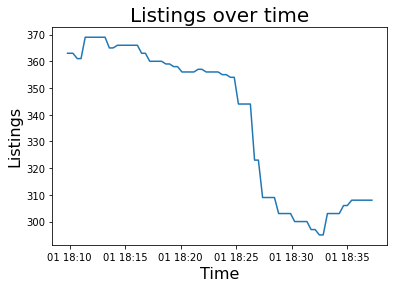

Loop n°:  75
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
75 2022-04-01 18:36:07.601901     308.0
76 2022-04-01 18:36:28.115562     308.0
77 2022-04-01 18:36:52.018056     308.0
78 2022-04-01 18:37:12.754136     308.0
79 2022-04-01 18:37:35.520765     306.0

[80 rows x 2 columns]


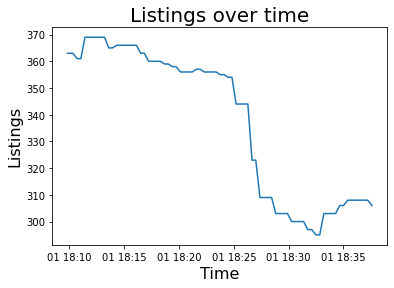

Loop n°:  76
test Access was denied
test2 True
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
76 2022-04-01 18:36:28.115562     308.0
77 2022-04-01 18:36:52.018056     308.0
78 2022-04-01 18:37:12.754136     308.0
79 2022-04-01 18:37:35.520765     306.0
80 2022-04-01 18:37:56.160944     306.0

[81 rows x 2 columns]


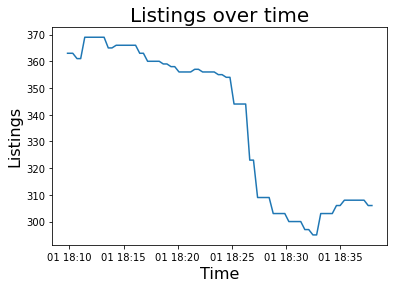

Loop n°:  77
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
77 2022-04-01 18:36:52.018056     308.0
78 2022-04-01 18:37:12.754136     308.0
79 2022-04-01 18:37:35.520765     306.0
80 2022-04-01 18:37:56.160944     306.0
81 2022-04-01 18:38:19.107132     307.0

[82 rows x 2 columns]


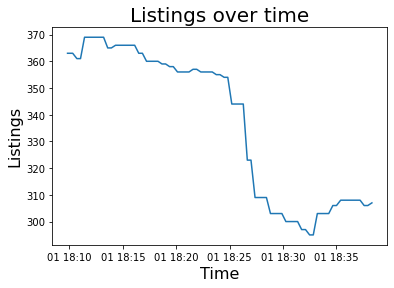

Loop n°:  78
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
78 2022-04-01 18:37:12.754136     308.0
79 2022-04-01 18:37:35.520765     306.0
80 2022-04-01 18:37:56.160944     306.0
81 2022-04-01 18:38:19.107132     307.0
82 2022-04-01 18:38:39.590644     307.0

[83 rows x 2 columns]


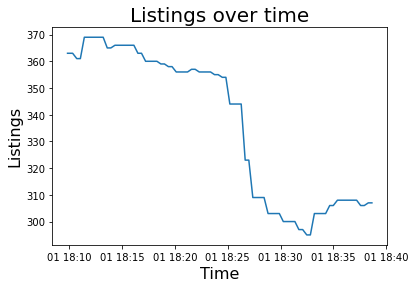

Loop n°:  79
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
79 2022-04-01 18:37:35.520765     306.0
80 2022-04-01 18:37:56.160944     306.0
81 2022-04-01 18:38:19.107132     307.0
82 2022-04-01 18:38:39.590644     307.0
83 2022-04-01 18:39:02.356720     307.0

[84 rows x 2 columns]


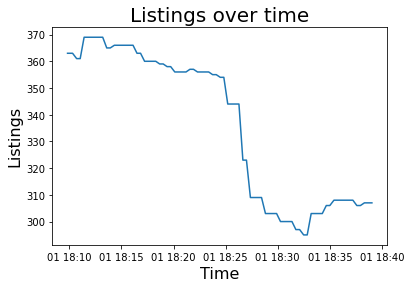

Loop n°:  80
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
80 2022-04-01 18:37:56.160944     306.0
81 2022-04-01 18:38:19.107132     307.0
82 2022-04-01 18:38:39.590644     307.0
83 2022-04-01 18:39:02.356720     307.0
84 2022-04-01 18:39:22.862634     307.0

[85 rows x 2 columns]


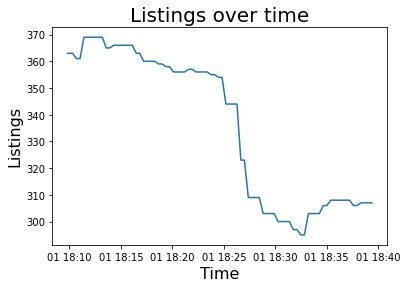

Loop n°:  81
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
81 2022-04-01 18:38:19.107132     307.0
82 2022-04-01 18:38:39.590644     307.0
83 2022-04-01 18:39:02.356720     307.0
84 2022-04-01 18:39:22.862634     307.0
85 2022-04-01 18:39:45.588400     307.0

[86 rows x 2 columns]


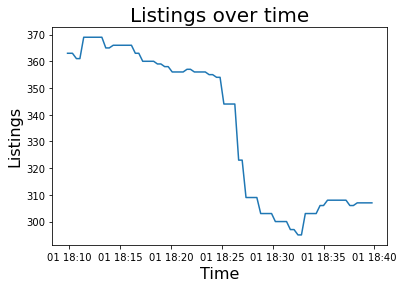

Loop n°:  82
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
82 2022-04-01 18:38:39.590644     307.0
83 2022-04-01 18:39:02.356720     307.0
84 2022-04-01 18:39:22.862634     307.0
85 2022-04-01 18:39:45.588400     307.0
86 2022-04-01 18:40:06.224523     307.0

[87 rows x 2 columns]


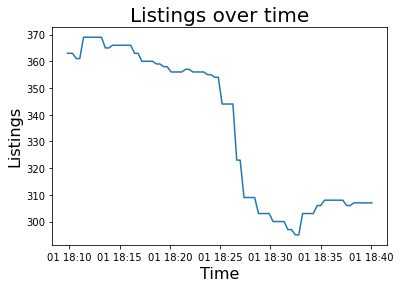

Loop n°:  83
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
83 2022-04-01 18:39:02.356720     307.0
84 2022-04-01 18:39:22.862634     307.0
85 2022-04-01 18:39:45.588400     307.0
86 2022-04-01 18:40:06.224523     307.0
87 2022-04-01 18:40:29.020796     311.0

[88 rows x 2 columns]


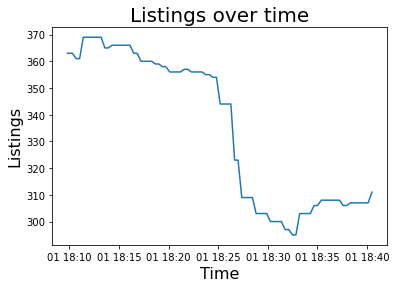

Loop n°:  84
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
84 2022-04-01 18:39:22.862634     307.0
85 2022-04-01 18:39:45.588400     307.0
86 2022-04-01 18:40:06.224523     307.0
87 2022-04-01 18:40:29.020796     311.0
88 2022-04-01 18:40:49.398773     311.0

[89 rows x 2 columns]


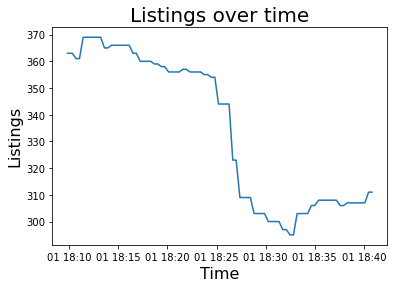

Loop n°:  85
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
85 2022-04-01 18:39:45.588400     307.0
86 2022-04-01 18:40:06.224523     307.0
87 2022-04-01 18:40:29.020796     311.0
88 2022-04-01 18:40:49.398773     311.0
89 2022-04-01 18:41:12.823712     318.0

[90 rows x 2 columns]


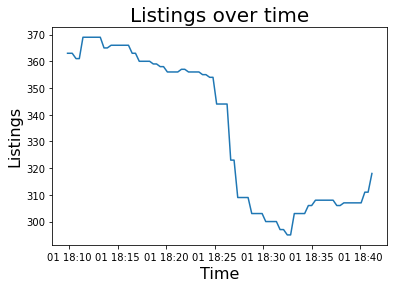

Loop n°:  86
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
86 2022-04-01 18:40:06.224523     307.0
87 2022-04-01 18:40:29.020796     311.0
88 2022-04-01 18:40:49.398773     311.0
89 2022-04-01 18:41:12.823712     318.0
90 2022-04-01 18:41:33.475698     318.0

[91 rows x 2 columns]


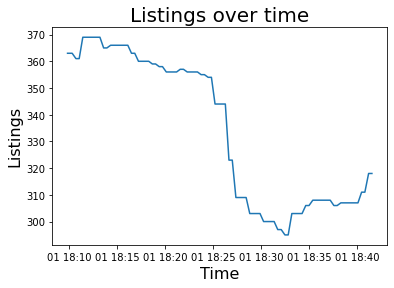

Loop n°:  87
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
87 2022-04-01 18:40:29.020796     311.0
88 2022-04-01 18:40:49.398773     311.0
89 2022-04-01 18:41:12.823712     318.0
90 2022-04-01 18:41:33.475698     318.0
91 2022-04-01 18:42:04.645820     318.0

[92 rows x 2 columns]


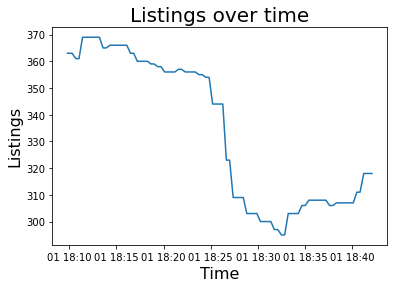

Loop n°:  88
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
88 2022-04-01 18:40:49.398773     311.0
89 2022-04-01 18:41:12.823712     318.0
90 2022-04-01 18:41:33.475698     318.0
91 2022-04-01 18:42:04.645820     318.0
92 2022-04-01 18:42:25.035106     318.0

[93 rows x 2 columns]


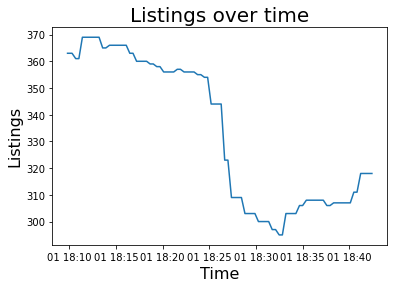

Loop n°:  89
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
89 2022-04-01 18:41:12.823712     318.0
90 2022-04-01 18:41:33.475698     318.0
91 2022-04-01 18:42:04.645820     318.0
92 2022-04-01 18:42:25.035106     318.0
93 2022-04-01 18:42:48.254342     320.0

[94 rows x 2 columns]


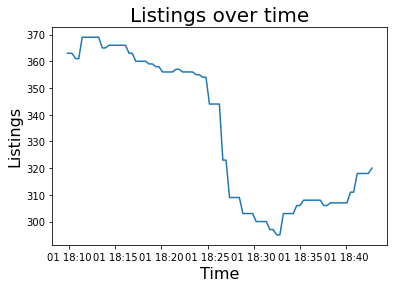

Loop n°:  90
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
90 2022-04-01 18:41:33.475698     318.0
91 2022-04-01 18:42:04.645820     318.0
92 2022-04-01 18:42:25.035106     318.0
93 2022-04-01 18:42:48.254342     320.0
94 2022-04-01 18:43:08.872596     320.0

[95 rows x 2 columns]


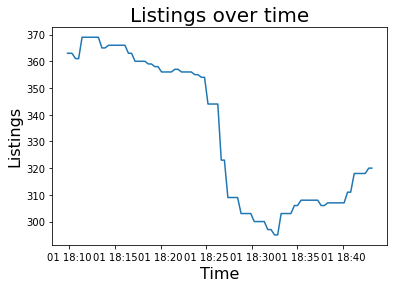

Loop n°:  91
test Access was denied
test2 True
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
91 2022-04-01 18:42:04.645820     318.0
92 2022-04-01 18:42:25.035106     318.0
93 2022-04-01 18:42:48.254342     320.0
94 2022-04-01 18:43:08.872596     320.0
95 2022-04-01 18:43:32.197907     320.0

[96 rows x 2 columns]


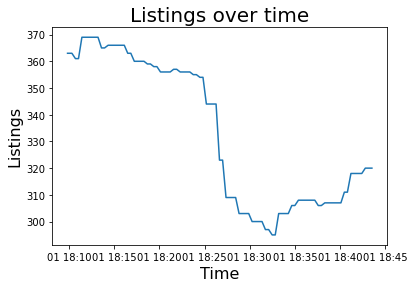

Loop n°:  92
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
92 2022-04-01 18:42:25.035106     318.0
93 2022-04-01 18:42:48.254342     320.0
94 2022-04-01 18:43:08.872596     320.0
95 2022-04-01 18:43:32.197907     320.0
96 2022-04-01 18:43:52.594248     320.0

[97 rows x 2 columns]


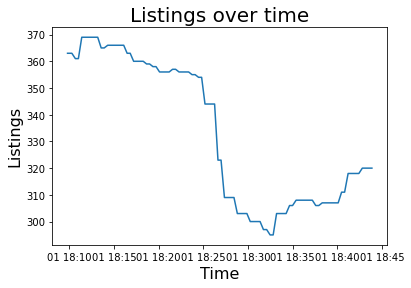

Loop n°:  93
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
93 2022-04-01 18:42:48.254342     320.0
94 2022-04-01 18:43:08.872596     320.0
95 2022-04-01 18:43:32.197907     320.0
96 2022-04-01 18:43:52.594248     320.0
97 2022-04-01 18:44:16.265881     328.0

[98 rows x 2 columns]


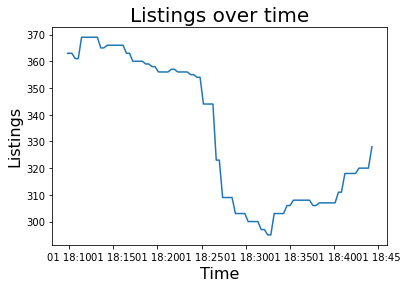

Loop n°:  94
test Access was denied
test2 True
hello_world
hello_world
hello_world
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
94 2022-04-01 18:43:08.872596     320.0
95 2022-04-01 18:43:32.197907     320.0
96 2022-04-01 18:43:52.594248     320.0
97 2022-04-01 18:44:16.265881     328.0
98 2022-04-01 18:44:36.902078     328.0

[99 rows x 2 columns]


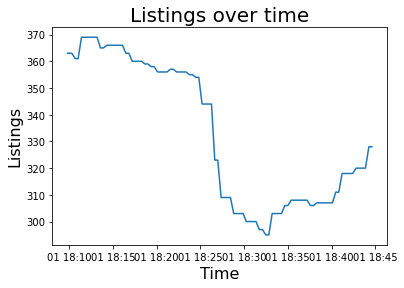

Loop n°:  95
test Everai Heroes: Du
test2 False
                         date  listings
0  2022-04-01 18:09:49.298445     363.0
1  2022-04-01 18:09:54.772768     363.0
2  2022-04-01 18:10:00.132164     363.0
3  2022-04-01 18:10:05.676678     363.0
4  2022-04-01 18:10:18.259884     363.0
..                        ...       ...
95 2022-04-01 18:43:32.197907     320.0
96 2022-04-01 18:43:52.594248     320.0
97 2022-04-01 18:44:16.265881     328.0
98 2022-04-01 18:44:36.902078     328.0
99 2022-04-01 18:44:59.674907     328.0

[100 rows x 2 columns]


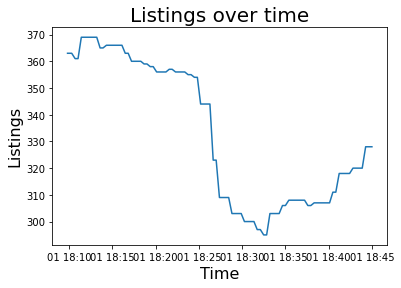

Loop n°:  96
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
96  2022-04-01 18:43:52.594248     320.0
97  2022-04-01 18:44:16.265881     328.0
98  2022-04-01 18:44:36.902078     328.0
99  2022-04-01 18:44:59.674907     328.0
100 2022-04-01 18:45:20.350191     328.0

[101 rows x 2 columns]


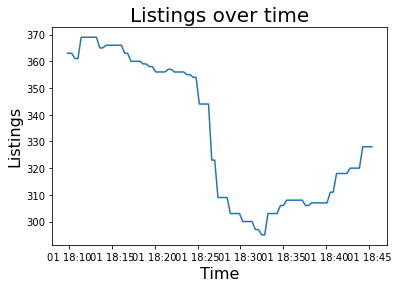

Loop n°:  97
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
97  2022-04-01 18:44:16.265881     328.0
98  2022-04-01 18:44:36.902078     328.0
99  2022-04-01 18:44:59.674907     328.0
100 2022-04-01 18:45:20.350191     328.0
101 2022-04-01 18:45:43.030561     328.0

[102 rows x 2 columns]


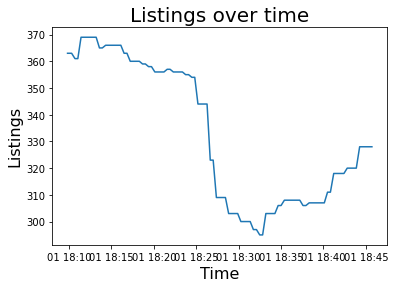

Loop n°:  98
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
98  2022-04-01 18:44:36.902078     328.0
99  2022-04-01 18:44:59.674907     328.0
100 2022-04-01 18:45:20.350191     328.0
101 2022-04-01 18:45:43.030561     328.0
102 2022-04-01 18:46:03.738055     328.0

[103 rows x 2 columns]


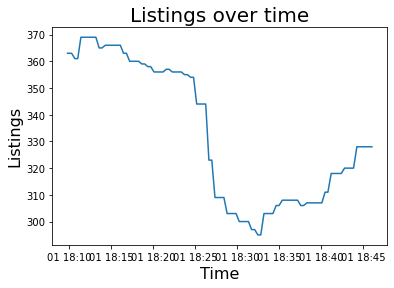

Loop n°:  99
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
99  2022-04-01 18:44:59.674907     328.0
100 2022-04-01 18:45:20.350191     328.0
101 2022-04-01 18:45:43.030561     328.0
102 2022-04-01 18:46:03.738055     328.0
103 2022-04-01 18:46:28.120785     331.0

[104 rows x 2 columns]


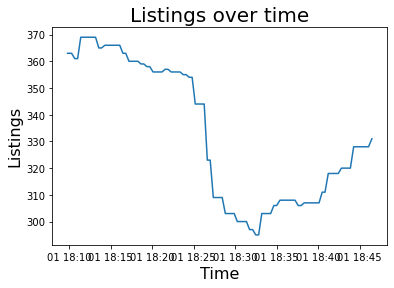

Loop n°:  100
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
100 2022-04-01 18:45:20.350191     328.0
101 2022-04-01 18:45:43.030561     328.0
102 2022-04-01 18:46:03.738055     328.0
103 2022-04-01 18:46:28.120785     331.0
104 2022-04-01 18:46:51.362199     331.0

[105 rows x 2 columns]


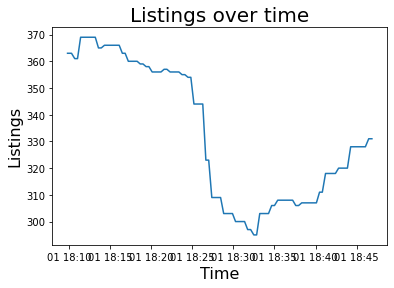

Loop n°:  101
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
101 2022-04-01 18:45:43.030561     328.0
102 2022-04-01 18:46:03.738055     328.0
103 2022-04-01 18:46:28.120785     331.0
104 2022-04-01 18:46:51.362199     331.0
105 2022-04-01 18:47:12.508545     331.0

[106 rows x 2 columns]


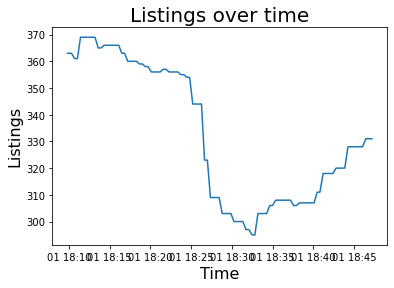

Loop n°:  102
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
102 2022-04-01 18:46:03.738055     328.0
103 2022-04-01 18:46:28.120785     331.0
104 2022-04-01 18:46:51.362199     331.0
105 2022-04-01 18:47:12.508545     331.0
106 2022-04-01 18:47:34.971259     330.0

[107 rows x 2 columns]


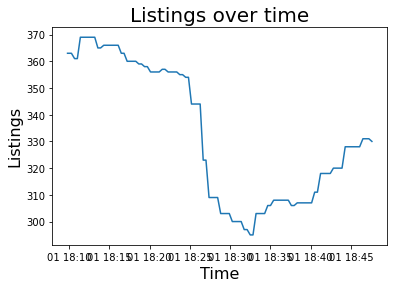

Loop n°:  103
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
103 2022-04-01 18:46:28.120785     331.0
104 2022-04-01 18:46:51.362199     331.0
105 2022-04-01 18:47:12.508545     331.0
106 2022-04-01 18:47:34.971259     330.0
107 2022-04-01 18:47:55.697483     330.0

[108 rows x 2 columns]


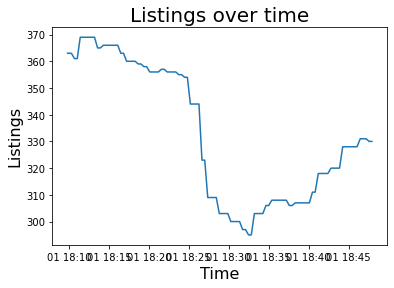

Loop n°:  104
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
104 2022-04-01 18:46:51.362199     331.0
105 2022-04-01 18:47:12.508545     331.0
106 2022-04-01 18:47:34.971259     330.0
107 2022-04-01 18:47:55.697483     330.0
108 2022-04-01 18:48:18.460418     330.0

[109 rows x 2 columns]


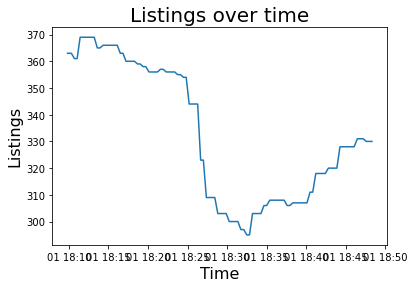

Loop n°:  105
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
105 2022-04-01 18:47:12.508545     331.0
106 2022-04-01 18:47:34.971259     330.0
107 2022-04-01 18:47:55.697483     330.0
108 2022-04-01 18:48:18.460418     330.0
109 2022-04-01 18:48:39.719059     330.0

[110 rows x 2 columns]


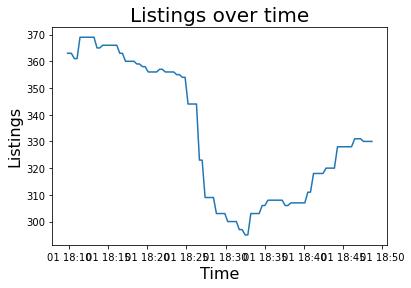

Loop n°:  106
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
106 2022-04-01 18:47:34.971259     330.0
107 2022-04-01 18:47:55.697483     330.0
108 2022-04-01 18:48:18.460418     330.0
109 2022-04-01 18:48:39.719059     330.0
110 2022-04-01 18:49:02.976543     330.0

[111 rows x 2 columns]


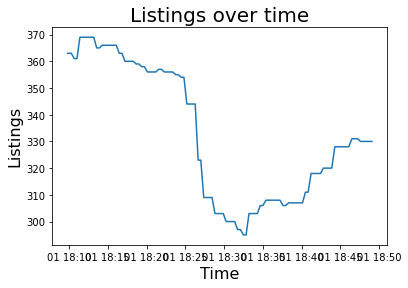

Loop n°:  107
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
107 2022-04-01 18:47:55.697483     330.0
108 2022-04-01 18:48:18.460418     330.0
109 2022-04-01 18:48:39.719059     330.0
110 2022-04-01 18:49:02.976543     330.0
111 2022-04-01 18:49:23.670483     330.0

[112 rows x 2 columns]


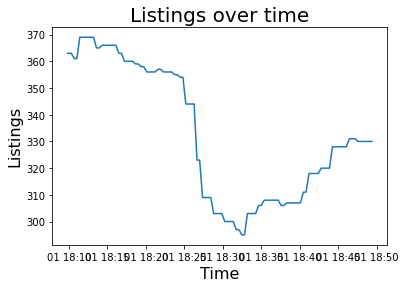

Loop n°:  108
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
108 2022-04-01 18:48:18.460418     330.0
109 2022-04-01 18:48:39.719059     330.0
110 2022-04-01 18:49:02.976543     330.0
111 2022-04-01 18:49:23.670483     330.0
112 2022-04-01 18:49:47.005861     334.0

[113 rows x 2 columns]


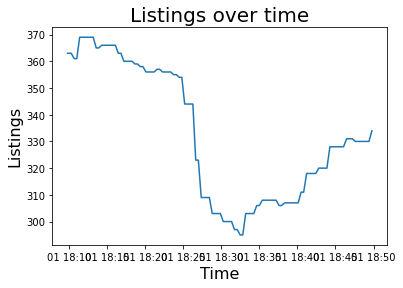

Loop n°:  109
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
109 2022-04-01 18:48:39.719059     330.0
110 2022-04-01 18:49:02.976543     330.0
111 2022-04-01 18:49:23.670483     330.0
112 2022-04-01 18:49:47.005861     334.0
113 2022-04-01 18:50:09.104150     334.0

[114 rows x 2 columns]


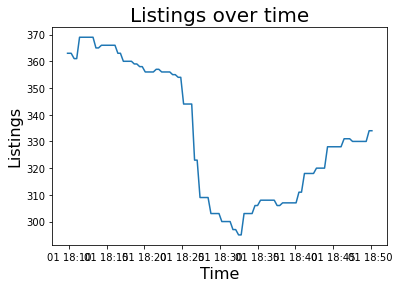

Loop n°:  110
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
110 2022-04-01 18:49:02.976543     330.0
111 2022-04-01 18:49:23.670483     330.0
112 2022-04-01 18:49:47.005861     334.0
113 2022-04-01 18:50:09.104150     334.0
114 2022-04-01 18:50:32.404533     336.0

[115 rows x 2 columns]


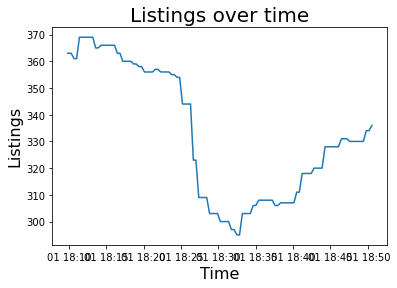

Loop n°:  111
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
111 2022-04-01 18:49:23.670483     330.0
112 2022-04-01 18:49:47.005861     334.0
113 2022-04-01 18:50:09.104150     334.0
114 2022-04-01 18:50:32.404533     336.0
115 2022-04-01 18:50:53.589294     336.0

[116 rows x 2 columns]


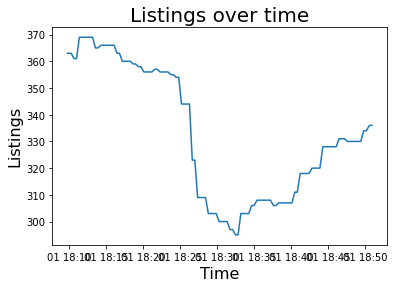

Loop n°:  112
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
112 2022-04-01 18:49:47.005861     334.0
113 2022-04-01 18:50:09.104150     334.0
114 2022-04-01 18:50:32.404533     336.0
115 2022-04-01 18:50:53.589294     336.0
116 2022-04-01 18:51:16.349393     339.0

[117 rows x 2 columns]


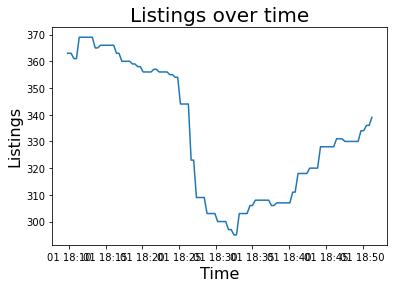

Loop n°:  113
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
113 2022-04-01 18:50:09.104150     334.0
114 2022-04-01 18:50:32.404533     336.0
115 2022-04-01 18:50:53.589294     336.0
116 2022-04-01 18:51:16.349393     339.0
117 2022-04-01 18:51:37.548711     339.0

[118 rows x 2 columns]


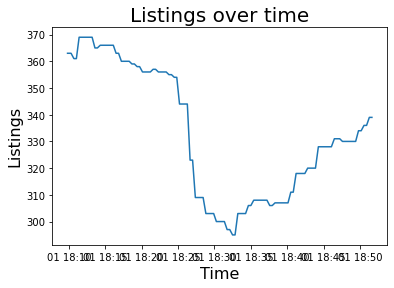

Loop n°:  114
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
114 2022-04-01 18:50:32.404533     336.0
115 2022-04-01 18:50:53.589294     336.0
116 2022-04-01 18:51:16.349393     339.0
117 2022-04-01 18:51:37.548711     339.0
118 2022-04-01 18:52:00.488165     339.0

[119 rows x 2 columns]


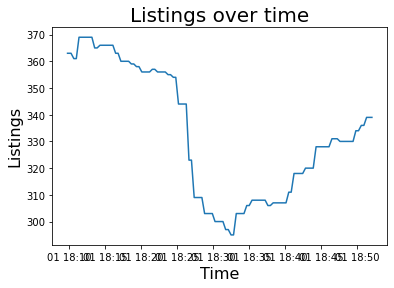

Loop n°:  115
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
115 2022-04-01 18:50:53.589294     336.0
116 2022-04-01 18:51:16.349393     339.0
117 2022-04-01 18:51:37.548711     339.0
118 2022-04-01 18:52:00.488165     339.0
119 2022-04-01 18:52:22.181195     339.0

[120 rows x 2 columns]


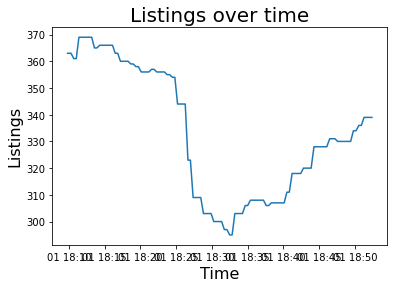

Loop n°:  116
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
116 2022-04-01 18:51:16.349393     339.0
117 2022-04-01 18:51:37.548711     339.0
118 2022-04-01 18:52:00.488165     339.0
119 2022-04-01 18:52:22.181195     339.0
120 2022-04-01 18:52:45.021012     342.0

[121 rows x 2 columns]


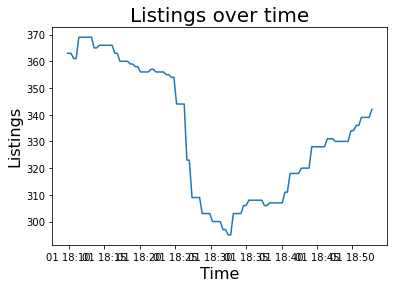

Loop n°:  117
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
117 2022-04-01 18:51:37.548711     339.0
118 2022-04-01 18:52:00.488165     339.0
119 2022-04-01 18:52:22.181195     339.0
120 2022-04-01 18:52:45.021012     342.0
121 2022-04-01 18:53:05.922521     342.0

[122 rows x 2 columns]


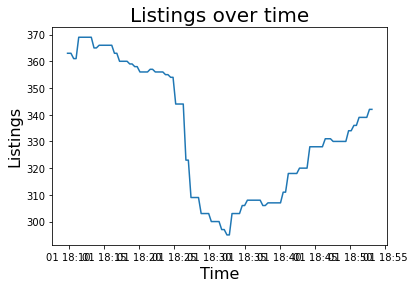

Loop n°:  118
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
118 2022-04-01 18:52:00.488165     339.0
119 2022-04-01 18:52:22.181195     339.0
120 2022-04-01 18:52:45.021012     342.0
121 2022-04-01 18:53:05.922521     342.0
122 2022-04-01 18:53:30.522227     341.0

[123 rows x 2 columns]


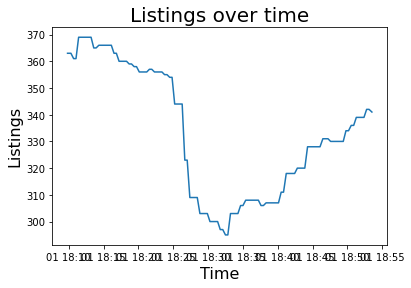

Loop n°:  119
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
119 2022-04-01 18:52:22.181195     339.0
120 2022-04-01 18:52:45.021012     342.0
121 2022-04-01 18:53:05.922521     342.0
122 2022-04-01 18:53:30.522227     341.0
123 2022-04-01 18:53:51.469050     341.0

[124 rows x 2 columns]


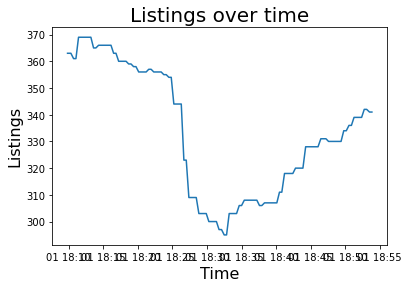

Loop n°:  120
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
120 2022-04-01 18:52:45.021012     342.0
121 2022-04-01 18:53:05.922521     342.0
122 2022-04-01 18:53:30.522227     341.0
123 2022-04-01 18:53:51.469050     341.0
124 2022-04-01 18:54:14.241150     341.0

[125 rows x 2 columns]


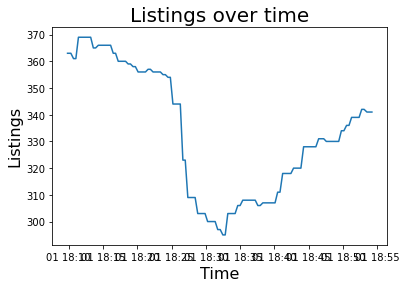

Loop n°:  121
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
121 2022-04-01 18:53:05.922521     342.0
122 2022-04-01 18:53:30.522227     341.0
123 2022-04-01 18:53:51.469050     341.0
124 2022-04-01 18:54:14.241150     341.0
125 2022-04-01 18:54:35.585427     341.0

[126 rows x 2 columns]


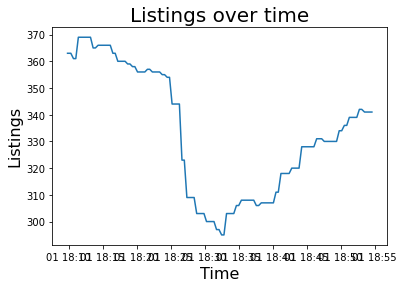

Loop n°:  122
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
122 2022-04-01 18:53:30.522227     341.0
123 2022-04-01 18:53:51.469050     341.0
124 2022-04-01 18:54:14.241150     341.0
125 2022-04-01 18:54:35.585427     341.0
126 2022-04-01 18:54:58.276267     339.0

[127 rows x 2 columns]


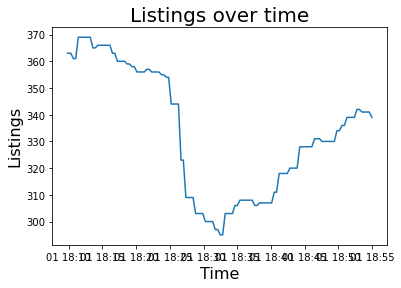

Loop n°:  123
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
123 2022-04-01 18:53:51.469050     341.0
124 2022-04-01 18:54:14.241150     341.0
125 2022-04-01 18:54:35.585427     341.0
126 2022-04-01 18:54:58.276267     339.0
127 2022-04-01 18:55:18.901880     339.0

[128 rows x 2 columns]


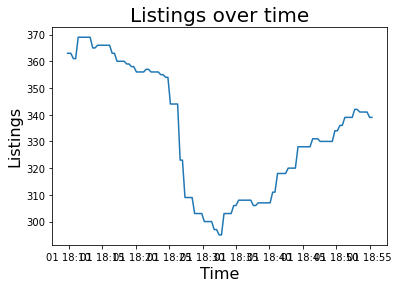

Loop n°:  124
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
124 2022-04-01 18:54:14.241150     341.0
125 2022-04-01 18:54:35.585427     341.0
126 2022-04-01 18:54:58.276267     339.0
127 2022-04-01 18:55:18.901880     339.0
128 2022-04-01 18:55:41.294272     337.0

[129 rows x 2 columns]


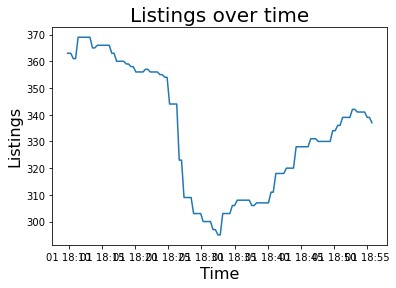

Loop n°:  125
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
125 2022-04-01 18:54:35.585427     341.0
126 2022-04-01 18:54:58.276267     339.0
127 2022-04-01 18:55:18.901880     339.0
128 2022-04-01 18:55:41.294272     337.0
129 2022-04-01 18:56:02.529195     337.0

[130 rows x 2 columns]


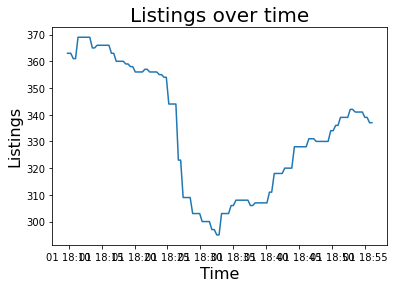

Loop n°:  126
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
126 2022-04-01 18:54:58.276267     339.0
127 2022-04-01 18:55:18.901880     339.0
128 2022-04-01 18:55:41.294272     337.0
129 2022-04-01 18:56:02.529195     337.0
130 2022-04-01 18:56:25.758667     338.0

[131 rows x 2 columns]


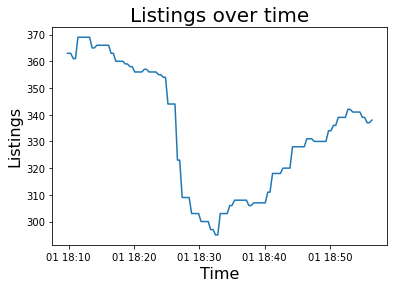

Loop n°:  127
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
127 2022-04-01 18:55:18.901880     339.0
128 2022-04-01 18:55:41.294272     337.0
129 2022-04-01 18:56:02.529195     337.0
130 2022-04-01 18:56:25.758667     338.0
131 2022-04-01 18:56:46.527916     338.0

[132 rows x 2 columns]


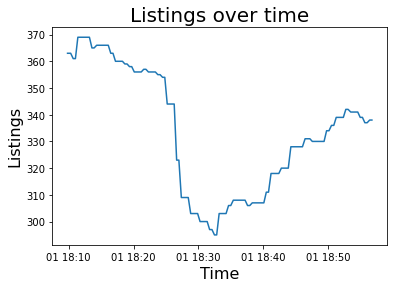

Loop n°:  128
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
128 2022-04-01 18:55:41.294272     337.0
129 2022-04-01 18:56:02.529195     337.0
130 2022-04-01 18:56:25.758667     338.0
131 2022-04-01 18:56:46.527916     338.0
132 2022-04-01 18:57:08.909168     338.0

[133 rows x 2 columns]


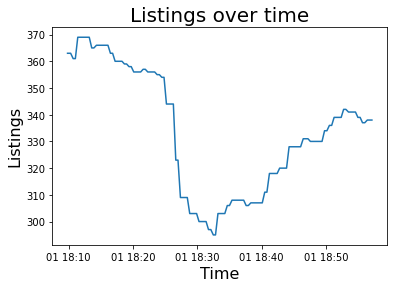

Loop n°:  129
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
129 2022-04-01 18:56:02.529195     337.0
130 2022-04-01 18:56:25.758667     338.0
131 2022-04-01 18:56:46.527916     338.0
132 2022-04-01 18:57:08.909168     338.0
133 2022-04-01 18:57:29.545970     338.0

[134 rows x 2 columns]


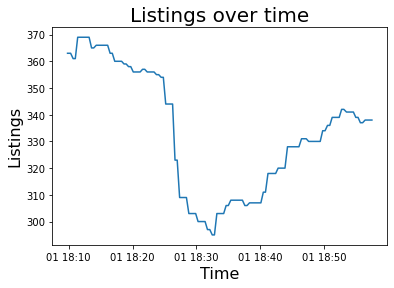

Loop n°:  130
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
130 2022-04-01 18:56:25.758667     338.0
131 2022-04-01 18:56:46.527916     338.0
132 2022-04-01 18:57:08.909168     338.0
133 2022-04-01 18:57:29.545970     338.0
134 2022-04-01 18:57:52.611823     337.0

[135 rows x 2 columns]


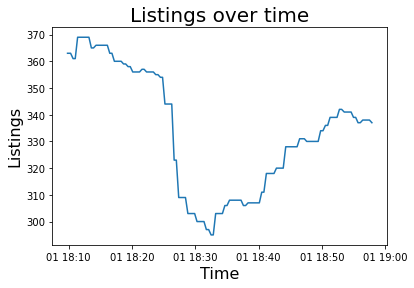

Loop n°:  131
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
131 2022-04-01 18:56:46.527916     338.0
132 2022-04-01 18:57:08.909168     338.0
133 2022-04-01 18:57:29.545970     338.0
134 2022-04-01 18:57:52.611823     337.0
135 2022-04-01 18:58:13.269178     337.0

[136 rows x 2 columns]


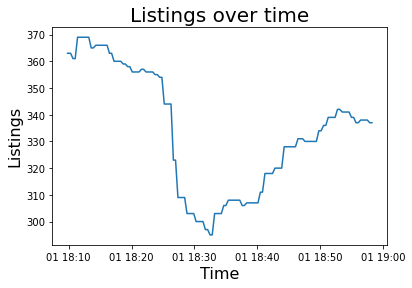

Loop n°:  132
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
132 2022-04-01 18:57:08.909168     338.0
133 2022-04-01 18:57:29.545970     338.0
134 2022-04-01 18:57:52.611823     337.0
135 2022-04-01 18:58:13.269178     337.0
136 2022-04-01 18:58:35.949579     331.0

[137 rows x 2 columns]


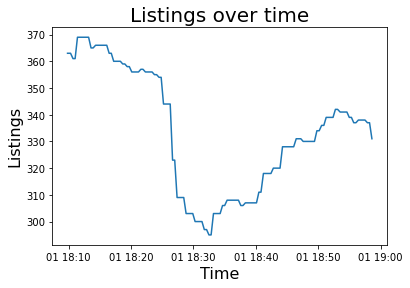

Loop n°:  133
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
133 2022-04-01 18:57:29.545970     338.0
134 2022-04-01 18:57:52.611823     337.0
135 2022-04-01 18:58:13.269178     337.0
136 2022-04-01 18:58:35.949579     331.0
137 2022-04-01 18:58:56.550629     331.0

[138 rows x 2 columns]


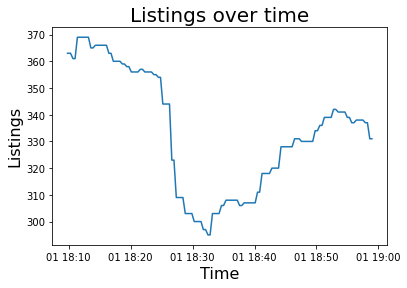

Loop n°:  134
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
134 2022-04-01 18:57:52.611823     337.0
135 2022-04-01 18:58:13.269178     337.0
136 2022-04-01 18:58:35.949579     331.0
137 2022-04-01 18:58:56.550629     331.0
138 2022-04-01 18:59:19.524013     332.0

[139 rows x 2 columns]


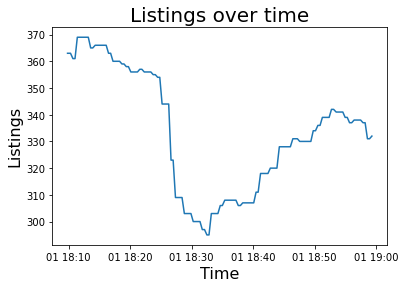

Loop n°:  135
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
135 2022-04-01 18:58:13.269178     337.0
136 2022-04-01 18:58:35.949579     331.0
137 2022-04-01 18:58:56.550629     331.0
138 2022-04-01 18:59:19.524013     332.0
139 2022-04-01 18:59:40.484815     332.0

[140 rows x 2 columns]


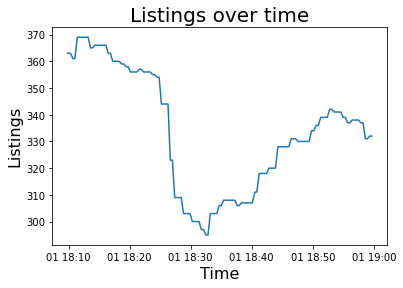

Loop n°:  136
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
136 2022-04-01 18:58:35.949579     331.0
137 2022-04-01 18:58:56.550629     331.0
138 2022-04-01 18:59:19.524013     332.0
139 2022-04-01 18:59:40.484815     332.0
140 2022-04-01 19:00:03.248512     332.0

[141 rows x 2 columns]


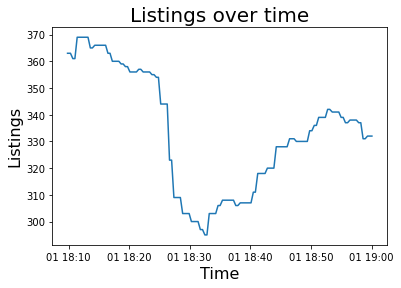

Loop n°:  137
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
137 2022-04-01 18:58:56.550629     331.0
138 2022-04-01 18:59:19.524013     332.0
139 2022-04-01 18:59:40.484815     332.0
140 2022-04-01 19:00:03.248512     332.0
141 2022-04-01 19:00:23.739427     332.0

[142 rows x 2 columns]


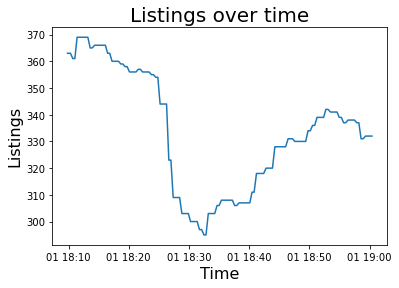

Loop n°:  138
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
138 2022-04-01 18:59:19.524013     332.0
139 2022-04-01 18:59:40.484815     332.0
140 2022-04-01 19:00:03.248512     332.0
141 2022-04-01 19:00:23.739427     332.0
142 2022-04-01 19:00:46.676461     325.0

[143 rows x 2 columns]


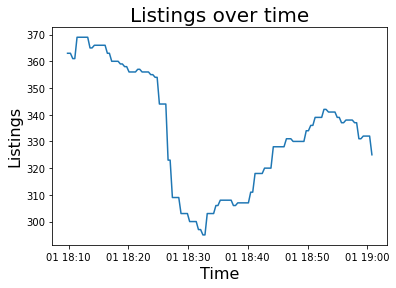

Loop n°:  139
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
139 2022-04-01 18:59:40.484815     332.0
140 2022-04-01 19:00:03.248512     332.0
141 2022-04-01 19:00:23.739427     332.0
142 2022-04-01 19:00:46.676461     325.0
143 2022-04-01 19:01:07.294070     325.0

[144 rows x 2 columns]


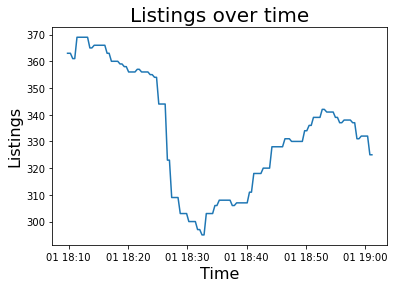

Loop n°:  140
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
140 2022-04-01 19:00:03.248512     332.0
141 2022-04-01 19:00:23.739427     332.0
142 2022-04-01 19:00:46.676461     325.0
143 2022-04-01 19:01:07.294070     325.0
144 2022-04-01 19:01:30.852412     327.0

[145 rows x 2 columns]


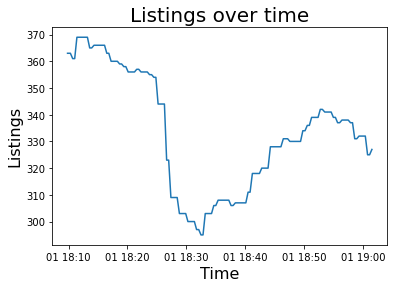

Loop n°:  141
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
141 2022-04-01 19:00:23.739427     332.0
142 2022-04-01 19:00:46.676461     325.0
143 2022-04-01 19:01:07.294070     325.0
144 2022-04-01 19:01:30.852412     327.0
145 2022-04-01 19:01:51.590263     327.0

[146 rows x 2 columns]


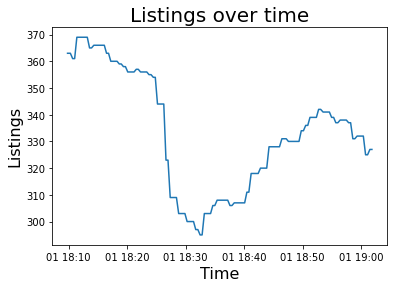

Loop n°:  142
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
142 2022-04-01 19:00:46.676461     325.0
143 2022-04-01 19:01:07.294070     325.0
144 2022-04-01 19:01:30.852412     327.0
145 2022-04-01 19:01:51.590263     327.0
146 2022-04-01 19:02:15.920612     327.0

[147 rows x 2 columns]


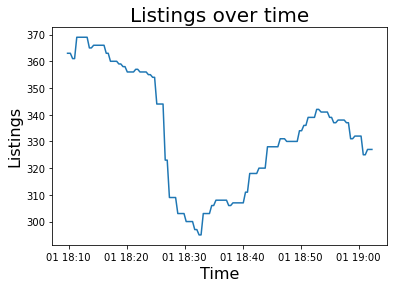

Loop n°:  143
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
143 2022-04-01 19:01:07.294070     325.0
144 2022-04-01 19:01:30.852412     327.0
145 2022-04-01 19:01:51.590263     327.0
146 2022-04-01 19:02:15.920612     327.0
147 2022-04-01 19:02:36.815438     327.0

[148 rows x 2 columns]


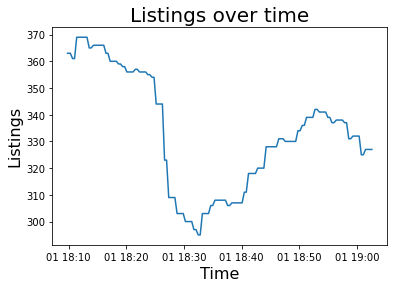

Loop n°:  144
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
144 2022-04-01 19:01:30.852412     327.0
145 2022-04-01 19:01:51.590263     327.0
146 2022-04-01 19:02:15.920612     327.0
147 2022-04-01 19:02:36.815438     327.0
148 2022-04-01 19:03:00.578327     321.0

[149 rows x 2 columns]


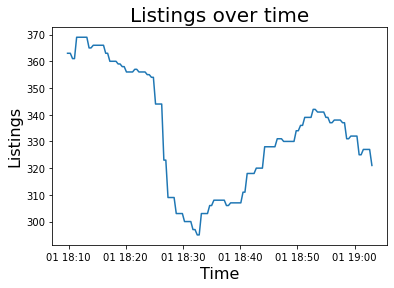

Loop n°:  145
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
145 2022-04-01 19:01:51.590263     327.0
146 2022-04-01 19:02:15.920612     327.0
147 2022-04-01 19:02:36.815438     327.0
148 2022-04-01 19:03:00.578327     321.0
149 2022-04-01 19:03:21.369870     321.0

[150 rows x 2 columns]


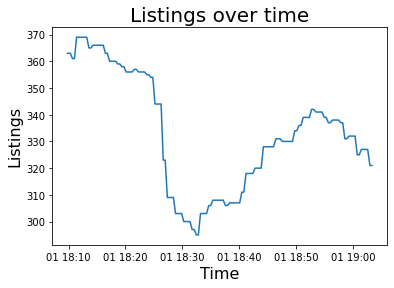

Loop n°:  146
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
146 2022-04-01 19:02:15.920612     327.0
147 2022-04-01 19:02:36.815438     327.0
148 2022-04-01 19:03:00.578327     321.0
149 2022-04-01 19:03:21.369870     321.0
150 2022-04-01 19:03:45.224679     324.0

[151 rows x 2 columns]


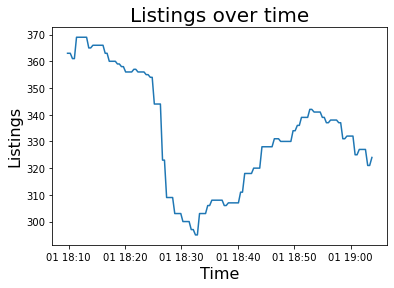

Loop n°:  147
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
147 2022-04-01 19:02:36.815438     327.0
148 2022-04-01 19:03:00.578327     321.0
149 2022-04-01 19:03:21.369870     321.0
150 2022-04-01 19:03:45.224679     324.0
151 2022-04-01 19:04:05.898280     324.0

[152 rows x 2 columns]


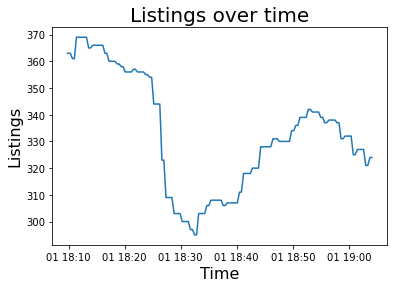

Loop n°:  148
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
148 2022-04-01 19:03:00.578327     321.0
149 2022-04-01 19:03:21.369870     321.0
150 2022-04-01 19:03:45.224679     324.0
151 2022-04-01 19:04:05.898280     324.0
152 2022-04-01 19:04:29.137784     330.0

[153 rows x 2 columns]


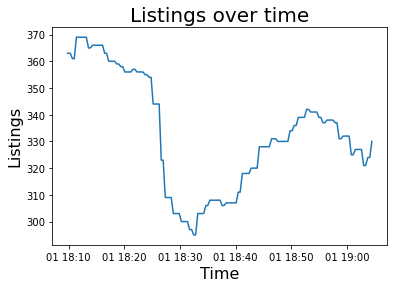

Loop n°:  149
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
149 2022-04-01 19:03:21.369870     321.0
150 2022-04-01 19:03:45.224679     324.0
151 2022-04-01 19:04:05.898280     324.0
152 2022-04-01 19:04:29.137784     330.0
153 2022-04-01 19:04:49.840621     330.0

[154 rows x 2 columns]


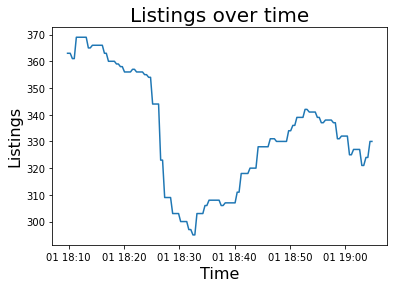

Loop n°:  150
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
150 2022-04-01 19:03:45.224679     324.0
151 2022-04-01 19:04:05.898280     324.0
152 2022-04-01 19:04:29.137784     330.0
153 2022-04-01 19:04:49.840621     330.0
154 2022-04-01 19:05:12.671946     330.0

[155 rows x 2 columns]


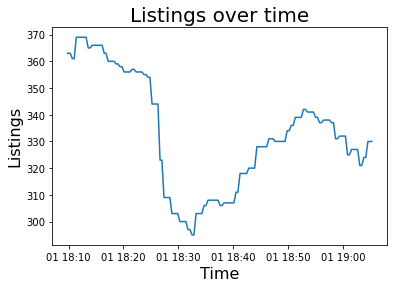

Loop n°:  151
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
151 2022-04-01 19:04:05.898280     324.0
152 2022-04-01 19:04:29.137784     330.0
153 2022-04-01 19:04:49.840621     330.0
154 2022-04-01 19:05:12.671946     330.0
155 2022-04-01 19:05:34.039718     330.0

[156 rows x 2 columns]


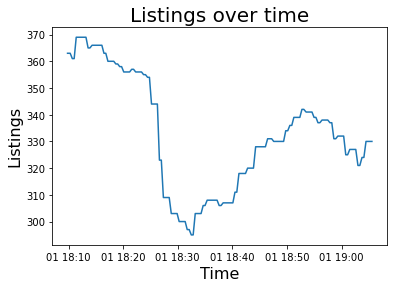

Loop n°:  152
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
152 2022-04-01 19:04:29.137784     330.0
153 2022-04-01 19:04:49.840621     330.0
154 2022-04-01 19:05:12.671946     330.0
155 2022-04-01 19:05:34.039718     330.0
156 2022-04-01 19:05:57.551400     333.0

[157 rows x 2 columns]


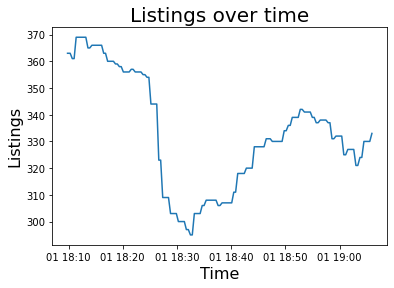

Loop n°:  153
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
153 2022-04-01 19:04:49.840621     330.0
154 2022-04-01 19:05:12.671946     330.0
155 2022-04-01 19:05:34.039718     330.0
156 2022-04-01 19:05:57.551400     333.0
157 2022-04-01 19:06:18.645486     333.0

[158 rows x 2 columns]


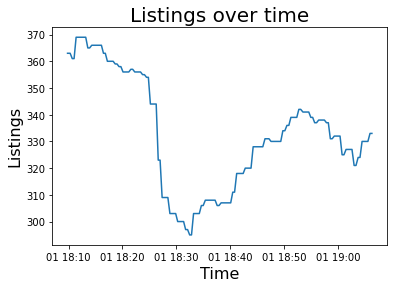

Loop n°:  154
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
154 2022-04-01 19:05:12.671946     330.0
155 2022-04-01 19:05:34.039718     330.0
156 2022-04-01 19:05:57.551400     333.0
157 2022-04-01 19:06:18.645486     333.0
158 2022-04-01 19:06:41.636597     333.0

[159 rows x 2 columns]


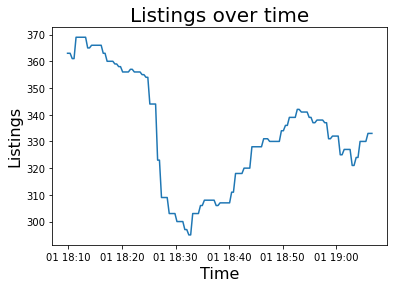

Loop n°:  155
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
155 2022-04-01 19:05:34.039718     330.0
156 2022-04-01 19:05:57.551400     333.0
157 2022-04-01 19:06:18.645486     333.0
158 2022-04-01 19:06:41.636597     333.0
159 2022-04-01 19:07:02.318040     333.0

[160 rows x 2 columns]


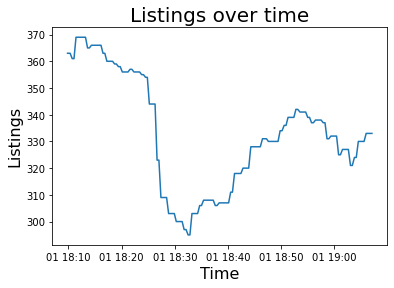

Loop n°:  156
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
156 2022-04-01 19:05:57.551400     333.0
157 2022-04-01 19:06:18.645486     333.0
158 2022-04-01 19:06:41.636597     333.0
159 2022-04-01 19:07:02.318040     333.0
160 2022-04-01 19:07:25.337185     341.0

[161 rows x 2 columns]


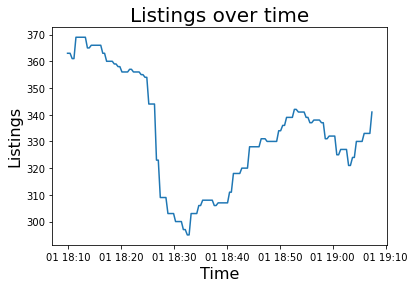

Loop n°:  157
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
157 2022-04-01 19:06:18.645486     333.0
158 2022-04-01 19:06:41.636597     333.0
159 2022-04-01 19:07:02.318040     333.0
160 2022-04-01 19:07:25.337185     341.0
161 2022-04-01 19:07:46.420396     341.0

[162 rows x 2 columns]


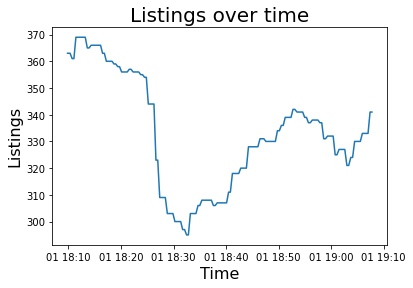

Loop n°:  158
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
158 2022-04-01 19:06:41.636597     333.0
159 2022-04-01 19:07:02.318040     333.0
160 2022-04-01 19:07:25.337185     341.0
161 2022-04-01 19:07:46.420396     341.0
162 2022-04-01 19:08:09.773868     341.0

[163 rows x 2 columns]


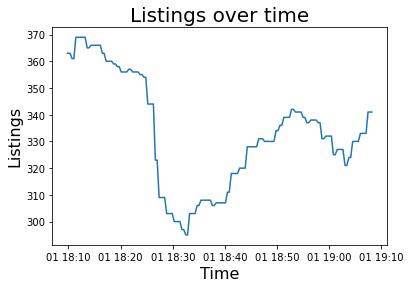

Loop n°:  159
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
159 2022-04-01 19:07:02.318040     333.0
160 2022-04-01 19:07:25.337185     341.0
161 2022-04-01 19:07:46.420396     341.0
162 2022-04-01 19:08:09.773868     341.0
163 2022-04-01 19:08:30.801695     341.0

[164 rows x 2 columns]


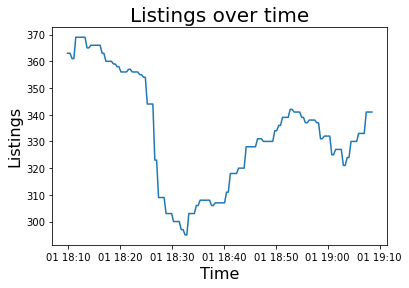

Loop n°:  160
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
160 2022-04-01 19:07:25.337185     341.0
161 2022-04-01 19:07:46.420396     341.0
162 2022-04-01 19:08:09.773868     341.0
163 2022-04-01 19:08:30.801695     341.0
164 2022-04-01 19:08:53.383527     346.0

[165 rows x 2 columns]


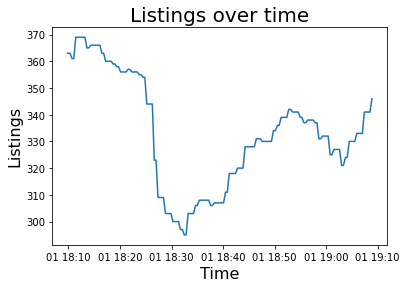

Loop n°:  161
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
161 2022-04-01 19:07:46.420396     341.0
162 2022-04-01 19:08:09.773868     341.0
163 2022-04-01 19:08:30.801695     341.0
164 2022-04-01 19:08:53.383527     346.0
165 2022-04-01 19:09:14.053510     346.0

[166 rows x 2 columns]


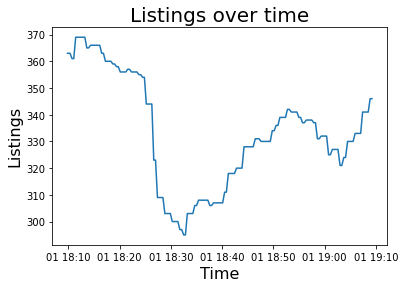

Loop n°:  162
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
162 2022-04-01 19:08:09.773868     341.0
163 2022-04-01 19:08:30.801695     341.0
164 2022-04-01 19:08:53.383527     346.0
165 2022-04-01 19:09:14.053510     346.0
166 2022-04-01 19:09:36.624027     359.0

[167 rows x 2 columns]


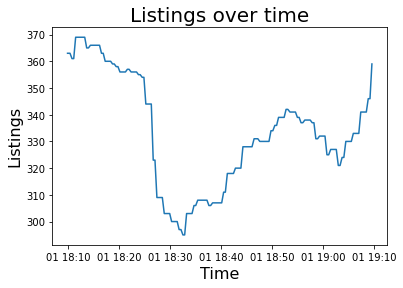

Loop n°:  163
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
163 2022-04-01 19:08:30.801695     341.0
164 2022-04-01 19:08:53.383527     346.0
165 2022-04-01 19:09:14.053510     346.0
166 2022-04-01 19:09:36.624027     359.0
167 2022-04-01 19:09:57.827440     359.0

[168 rows x 2 columns]


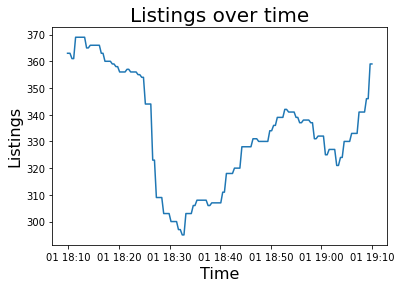

Loop n°:  164
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
164 2022-04-01 19:08:53.383527     346.0
165 2022-04-01 19:09:14.053510     346.0
166 2022-04-01 19:09:36.624027     359.0
167 2022-04-01 19:09:57.827440     359.0
168 2022-04-01 19:10:20.909782     365.0

[169 rows x 2 columns]


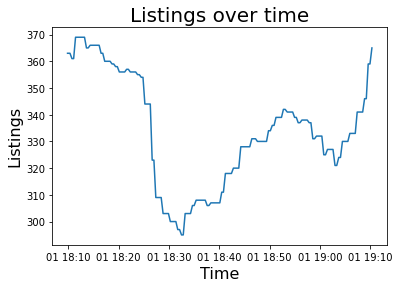

Loop n°:  165
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
165 2022-04-01 19:09:14.053510     346.0
166 2022-04-01 19:09:36.624027     359.0
167 2022-04-01 19:09:57.827440     359.0
168 2022-04-01 19:10:20.909782     365.0
169 2022-04-01 19:10:42.374401     365.0

[170 rows x 2 columns]


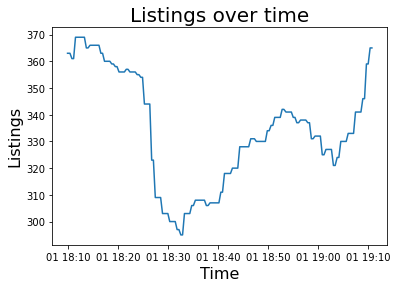

Loop n°:  166
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
166 2022-04-01 19:09:36.624027     359.0
167 2022-04-01 19:09:57.827440     359.0
168 2022-04-01 19:10:20.909782     365.0
169 2022-04-01 19:10:42.374401     365.0
170 2022-04-01 19:11:05.949901     365.0

[171 rows x 2 columns]


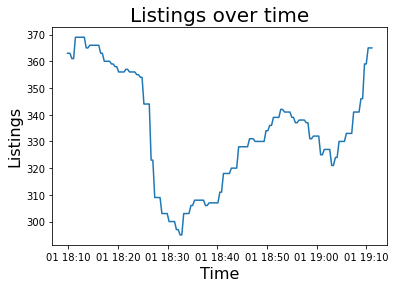

Loop n°:  167
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
167 2022-04-01 19:09:57.827440     359.0
168 2022-04-01 19:10:20.909782     365.0
169 2022-04-01 19:10:42.374401     365.0
170 2022-04-01 19:11:05.949901     365.0
171 2022-04-01 19:11:26.802561     365.0

[172 rows x 2 columns]


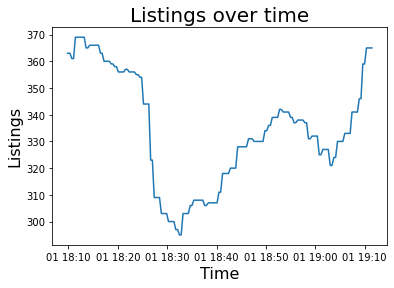

Loop n°:  168
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
168 2022-04-01 19:10:20.909782     365.0
169 2022-04-01 19:10:42.374401     365.0
170 2022-04-01 19:11:05.949901     365.0
171 2022-04-01 19:11:26.802561     365.0
172 2022-04-01 19:11:50.738950     369.0

[173 rows x 2 columns]


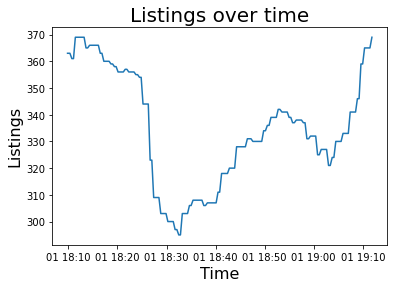

Loop n°:  169
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
169 2022-04-01 19:10:42.374401     365.0
170 2022-04-01 19:11:05.949901     365.0
171 2022-04-01 19:11:26.802561     365.0
172 2022-04-01 19:11:50.738950     369.0
173 2022-04-01 19:12:11.355822     369.0

[174 rows x 2 columns]


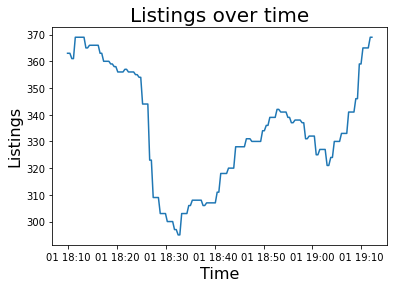

Loop n°:  170
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
170 2022-04-01 19:11:05.949901     365.0
171 2022-04-01 19:11:26.802561     365.0
172 2022-04-01 19:11:50.738950     369.0
173 2022-04-01 19:12:11.355822     369.0
174 2022-04-01 19:12:34.499772     376.0

[175 rows x 2 columns]


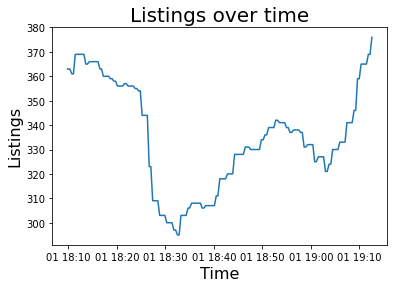

Loop n°:  171
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
171 2022-04-01 19:11:26.802561     365.0
172 2022-04-01 19:11:50.738950     369.0
173 2022-04-01 19:12:11.355822     369.0
174 2022-04-01 19:12:34.499772     376.0
175 2022-04-01 19:12:55.133589     376.0

[176 rows x 2 columns]


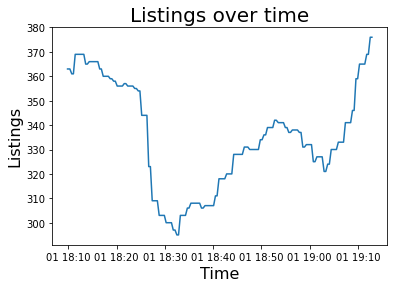

Loop n°:  172
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
172 2022-04-01 19:11:50.738950     369.0
173 2022-04-01 19:12:11.355822     369.0
174 2022-04-01 19:12:34.499772     376.0
175 2022-04-01 19:12:55.133589     376.0
176 2022-04-01 19:13:18.778797     376.0

[177 rows x 2 columns]


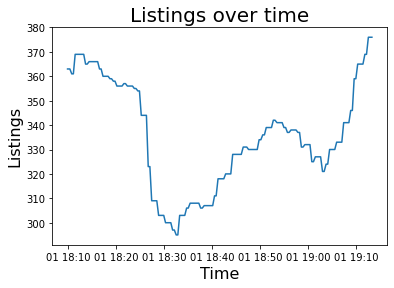

Loop n°:  173
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
173 2022-04-01 19:12:11.355822     369.0
174 2022-04-01 19:12:34.499772     376.0
175 2022-04-01 19:12:55.133589     376.0
176 2022-04-01 19:13:18.778797     376.0
177 2022-04-01 19:13:39.630825     376.0

[178 rows x 2 columns]


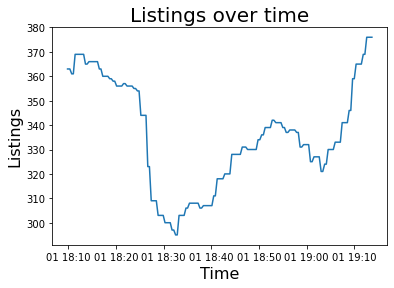

Loop n°:  174
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
174 2022-04-01 19:12:34.499772     376.0
175 2022-04-01 19:12:55.133589     376.0
176 2022-04-01 19:13:18.778797     376.0
177 2022-04-01 19:13:39.630825     376.0
178 2022-04-01 19:14:04.043839     382.0

[179 rows x 2 columns]


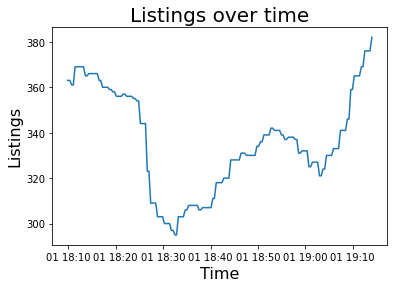

Loop n°:  175
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
175 2022-04-01 19:12:55.133589     376.0
176 2022-04-01 19:13:18.778797     376.0
177 2022-04-01 19:13:39.630825     376.0
178 2022-04-01 19:14:04.043839     382.0
179 2022-04-01 19:14:24.982616     382.0

[180 rows x 2 columns]


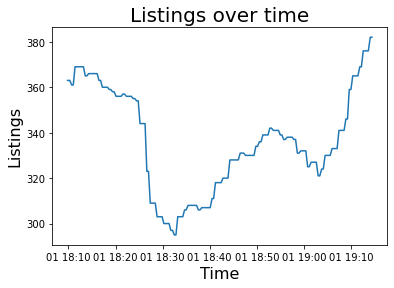

Loop n°:  176
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
176 2022-04-01 19:13:18.778797     376.0
177 2022-04-01 19:13:39.630825     376.0
178 2022-04-01 19:14:04.043839     382.0
179 2022-04-01 19:14:24.982616     382.0
180 2022-04-01 19:14:49.173426     384.0

[181 rows x 2 columns]


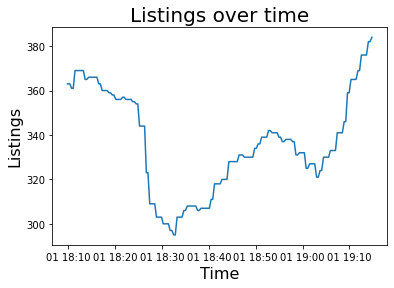

Loop n°:  177
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
177 2022-04-01 19:13:39.630825     376.0
178 2022-04-01 19:14:04.043839     382.0
179 2022-04-01 19:14:24.982616     382.0
180 2022-04-01 19:14:49.173426     384.0
181 2022-04-01 19:15:10.815941     384.0

[182 rows x 2 columns]


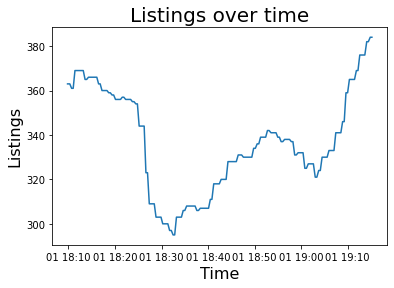

Loop n°:  178
test Access was denied
test2 True
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
178 2022-04-01 19:14:04.043839     382.0
179 2022-04-01 19:14:24.982616     382.0
180 2022-04-01 19:14:49.173426     384.0
181 2022-04-01 19:15:10.815941     384.0
182 2022-04-01 19:15:33.536418     394.0

[183 rows x 2 columns]


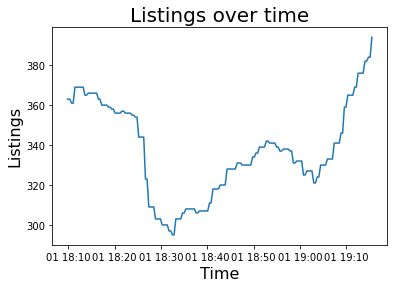

Loop n°:  179
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
179 2022-04-01 19:14:24.982616     382.0
180 2022-04-01 19:14:49.173426     384.0
181 2022-04-01 19:15:10.815941     384.0
182 2022-04-01 19:15:33.536418     394.0
183 2022-04-01 19:15:54.705343     394.0

[184 rows x 2 columns]


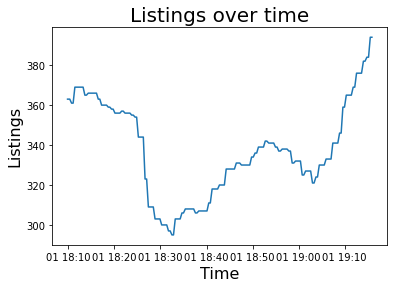

Loop n°:  180
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
180 2022-04-01 19:14:49.173426     384.0
181 2022-04-01 19:15:10.815941     384.0
182 2022-04-01 19:15:33.536418     394.0
183 2022-04-01 19:15:54.705343     394.0
184 2022-04-01 19:16:17.053439     394.0

[185 rows x 2 columns]


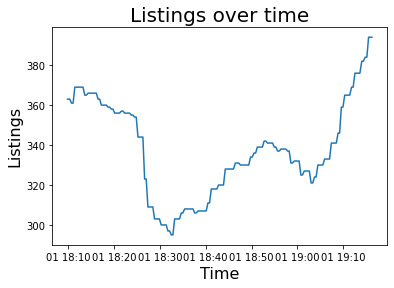

Loop n°:  181
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
181 2022-04-01 19:15:10.815941     384.0
182 2022-04-01 19:15:33.536418     394.0
183 2022-04-01 19:15:54.705343     394.0
184 2022-04-01 19:16:17.053439     394.0
185 2022-04-01 19:16:38.085572     394.0

[186 rows x 2 columns]


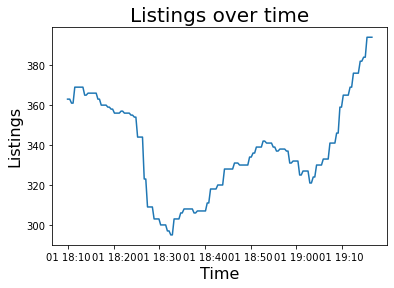

Loop n°:  182
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
182 2022-04-01 19:15:33.536418     394.0
183 2022-04-01 19:15:54.705343     394.0
184 2022-04-01 19:16:17.053439     394.0
185 2022-04-01 19:16:38.085572     394.0
186 2022-04-01 19:17:02.584561     401.0

[187 rows x 2 columns]


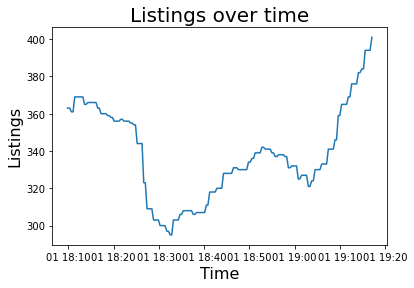

Loop n°:  183
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
183 2022-04-01 19:15:54.705343     394.0
184 2022-04-01 19:16:17.053439     394.0
185 2022-04-01 19:16:38.085572     394.0
186 2022-04-01 19:17:02.584561     401.0
187 2022-04-01 19:17:23.489262     401.0

[188 rows x 2 columns]


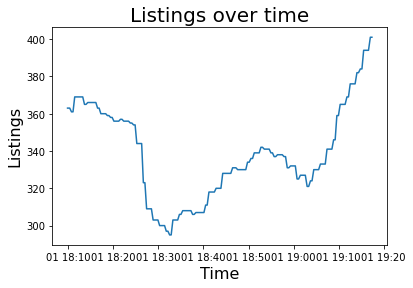

Loop n°:  184
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
184 2022-04-01 19:16:17.053439     394.0
185 2022-04-01 19:16:38.085572     394.0
186 2022-04-01 19:17:02.584561     401.0
187 2022-04-01 19:17:23.489262     401.0
188 2022-04-01 19:17:47.307629     407.0

[189 rows x 2 columns]


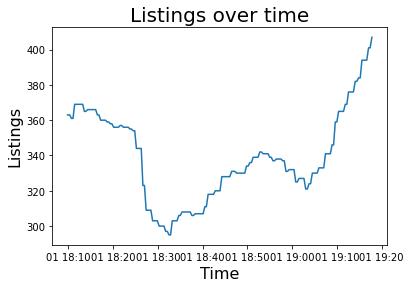

Loop n°:  185
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
185 2022-04-01 19:16:38.085572     394.0
186 2022-04-01 19:17:02.584561     401.0
187 2022-04-01 19:17:23.489262     401.0
188 2022-04-01 19:17:47.307629     407.0
189 2022-04-01 19:18:07.943097     407.0

[190 rows x 2 columns]


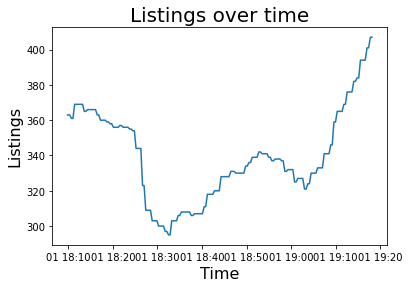

Loop n°:  186
test Access was denied
test2 True
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
186 2022-04-01 19:17:02.584561     401.0
187 2022-04-01 19:17:23.489262     401.0
188 2022-04-01 19:17:47.307629     407.0
189 2022-04-01 19:18:07.943097     407.0
190 2022-04-01 19:18:31.155128     422.0

[191 rows x 2 columns]


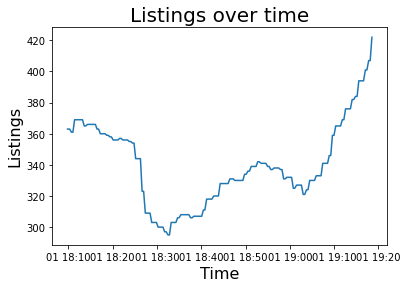

Loop n°:  187
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
187 2022-04-01 19:17:23.489262     401.0
188 2022-04-01 19:17:47.307629     407.0
189 2022-04-01 19:18:07.943097     407.0
190 2022-04-01 19:18:31.155128     422.0
191 2022-04-01 19:18:52.008626     422.0

[192 rows x 2 columns]


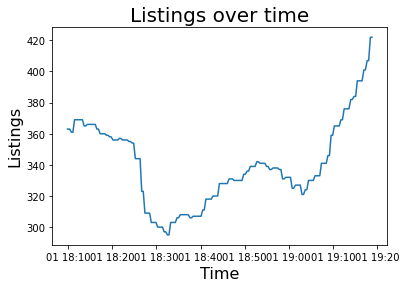

Loop n°:  188
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
188 2022-04-01 19:17:47.307629     407.0
189 2022-04-01 19:18:07.943097     407.0
190 2022-04-01 19:18:31.155128     422.0
191 2022-04-01 19:18:52.008626     422.0
192 2022-04-01 19:19:14.944104     422.0

[193 rows x 2 columns]


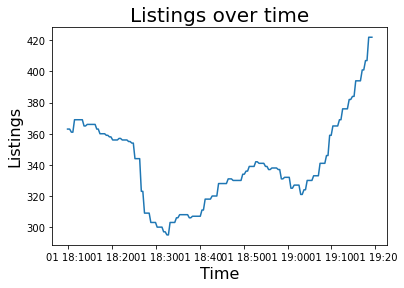

Loop n°:  189
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
189 2022-04-01 19:18:07.943097     407.0
190 2022-04-01 19:18:31.155128     422.0
191 2022-04-01 19:18:52.008626     422.0
192 2022-04-01 19:19:14.944104     422.0
193 2022-04-01 19:19:35.736076     422.0

[194 rows x 2 columns]


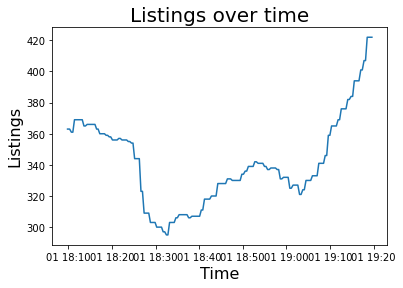

Loop n°:  190
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
190 2022-04-01 19:18:31.155128     422.0
191 2022-04-01 19:18:52.008626     422.0
192 2022-04-01 19:19:14.944104     422.0
193 2022-04-01 19:19:35.736076     422.0
194 2022-04-01 19:19:59.277354     428.0

[195 rows x 2 columns]


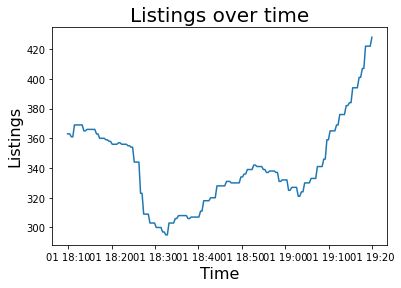

Loop n°:  191
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
191 2022-04-01 19:18:52.008626     422.0
192 2022-04-01 19:19:14.944104     422.0
193 2022-04-01 19:19:35.736076     422.0
194 2022-04-01 19:19:59.277354     428.0
195 2022-04-01 19:20:20.181751     428.0

[196 rows x 2 columns]


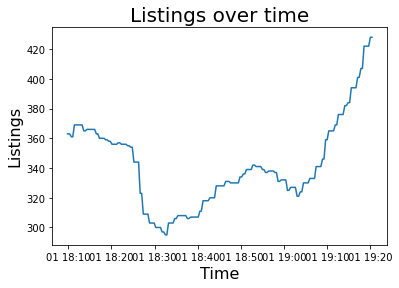

Loop n°:  192
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
192 2022-04-01 19:19:14.944104     422.0
193 2022-04-01 19:19:35.736076     422.0
194 2022-04-01 19:19:59.277354     428.0
195 2022-04-01 19:20:20.181751     428.0
196 2022-04-01 19:20:43.590083     440.0

[197 rows x 2 columns]


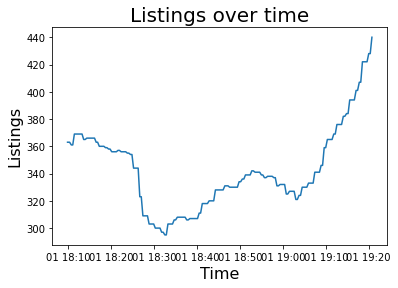

Loop n°:  193
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
193 2022-04-01 19:19:35.736076     422.0
194 2022-04-01 19:19:59.277354     428.0
195 2022-04-01 19:20:20.181751     428.0
196 2022-04-01 19:20:43.590083     440.0
197 2022-04-01 19:21:04.380561     440.0

[198 rows x 2 columns]


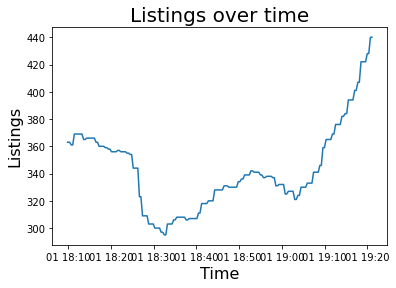

Loop n°:  194
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
194 2022-04-01 19:19:59.277354     428.0
195 2022-04-01 19:20:20.181751     428.0
196 2022-04-01 19:20:43.590083     440.0
197 2022-04-01 19:21:04.380561     440.0
198 2022-04-01 19:21:27.088830     442.0

[199 rows x 2 columns]


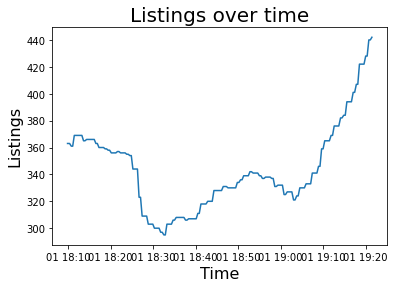

Loop n°:  195
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
195 2022-04-01 19:20:20.181751     428.0
196 2022-04-01 19:20:43.590083     440.0
197 2022-04-01 19:21:04.380561     440.0
198 2022-04-01 19:21:27.088830     442.0
199 2022-04-01 19:21:48.016549     442.0

[200 rows x 2 columns]


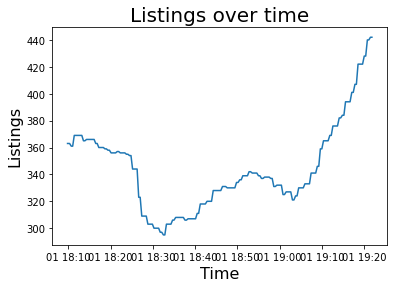

Loop n°:  196
test Everai Heroes: Du
test2 False
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
196 2022-04-01 19:20:43.590083     440.0
197 2022-04-01 19:21:04.380561     440.0
198 2022-04-01 19:21:27.088830     442.0
199 2022-04-01 19:21:48.016549     442.0
200 2022-04-01 19:22:10.574153     442.0

[201 rows x 2 columns]


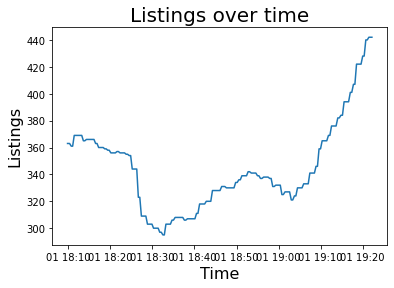

Loop n°:  197
test Access was denied
test2 True
hello_world
hello_world
hello_world
hello_world
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
197 2022-04-01 19:21:04.380561     440.0
198 2022-04-01 19:21:27.088830     442.0
199 2022-04-01 19:21:48.016549     442.0
200 2022-04-01 19:22:10.574153     442.0
201 2022-04-01 19:22:32.264428     442.0

[202 rows x 2 columns]


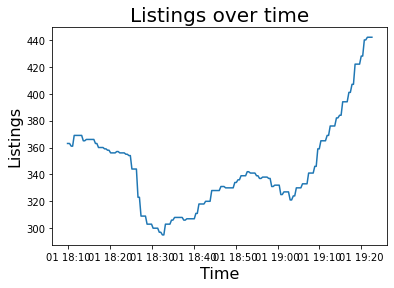

Loop n°:  198
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
198 2022-04-01 19:21:27.088830     442.0
199 2022-04-01 19:21:48.016549     442.0
200 2022-04-01 19:22:10.574153     442.0
201 2022-04-01 19:22:32.264428     442.0
202 2022-04-01 19:22:55.544731     442.0

[203 rows x 2 columns]


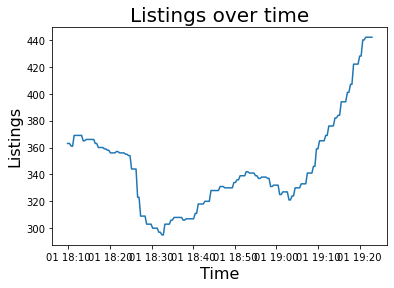

Loop n°:  199
test Access was denied
test2 True
hello_world
                          date  listings
0   2022-04-01 18:09:49.298445     363.0
1   2022-04-01 18:09:54.772768     363.0
2   2022-04-01 18:10:00.132164     363.0
3   2022-04-01 18:10:05.676678     363.0
4   2022-04-01 18:10:18.259884     363.0
..                         ...       ...
199 2022-04-01 19:21:48.016549     442.0
200 2022-04-01 19:22:10.574153     442.0
201 2022-04-01 19:22:32.264428     442.0
202 2022-04-01 19:22:55.544731     442.0
203 2022-04-01 19:23:16.379415     442.0

[204 rows x 2 columns]


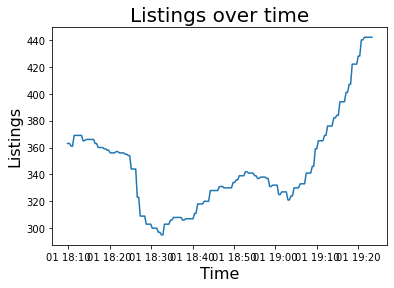

In [27]:
for i in range(200):
    print("Loop n°: ", i)
    new_row = récupérer_le_nombre_de_listings(url)
    df = df.append(new_row, ignore_index=True)
    # df.to_csv("mfers_listings.csv")
    
    print(df)
    
    plt.plot(df['date'], df['listings'])
    plt.title("Listings over time", fontsize=20)
    plt.ylabel("Listings", fontsize=16)
    plt.xlabel("Time", fontsize=16)
    plt.show()

    time.sleep(20)

Everai heroes

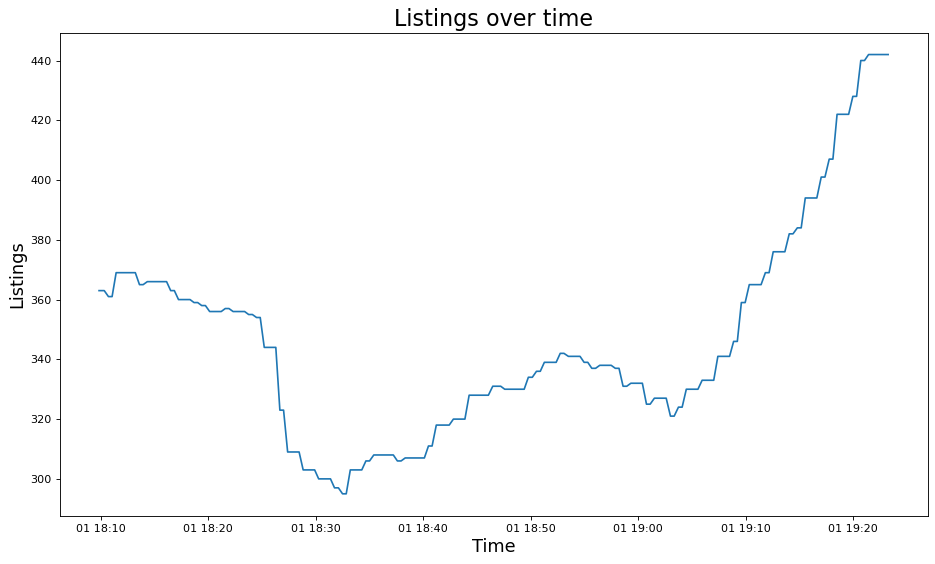

In [29]:
figure(figsize=(14,8), dpi=80)

plt.plot(df['date'], df['listings'])
plt.title("Listings over time", fontsize=20)
plt.ylabel("Listings", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.show()

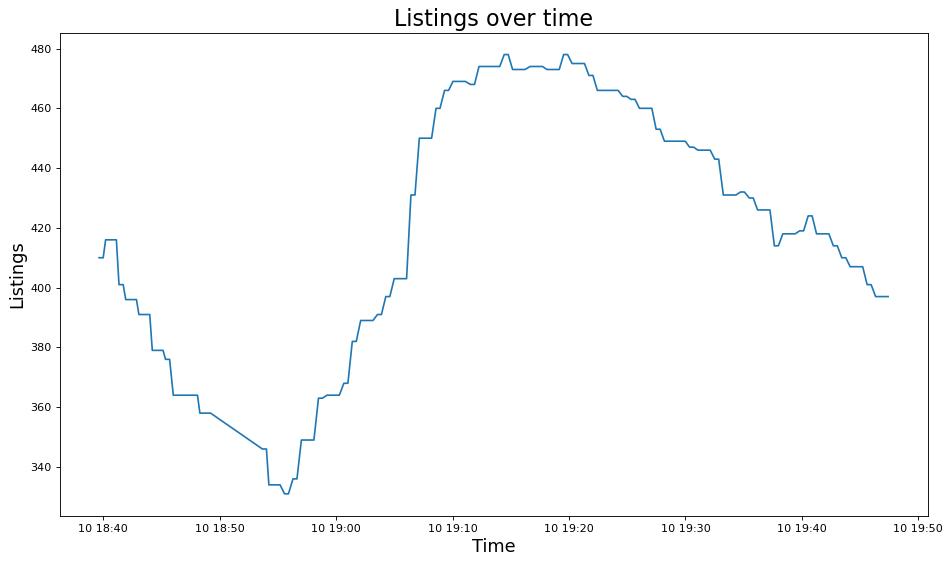

In [9]:
figure(figsize=(14,8), dpi=80)

plt.plot(df['date'], df['listings'])
plt.title("Listings over time", fontsize=20)
plt.ylabel("Listings", fontsize=16)
plt.xlabel("Time", fontsize=16)
plt.show()
